# 0. Введение

## 0.1. Контекст и проблема
В наше время всё большую популярность набирают сервисы доставки продуктов и различных товаров. Для удовлетворения растущего спроса компаниям приходится активно расширять штат курьеров. Однако не все курьеры выполняют свою работу добросовестно: часть из них значительно превышает ожидаемое время доставки, что негативно влияет на удовлетворённость клиентов и приводит к финансовым потерям.

Для решения этой проблемы компаниям важно уметь выявлять курьеров с аномально долгим временем доставки и при необходимости применять меры воздействия. Ключевым шагом в этом процессе является предсказание времени доставки: если известно, сколько времени должна занимать доставка в нормальных условиях, можно сравнить это значение с фактическим временем каждого курьера и выявлять отклонения.

Кроме того, точное предсказание времени доставки позволяет значительно улучшить пользовательский опыт: клиент получает более реалистичное представление о том, когда прибудет его заказ. Это помогает планировать время и повышает доверие к сервису.


## 0.2. Цель проекта

В рамках нашего проекта мы хотим построить модель, которая предсказывает время доставки на основе имеющихся данных. Точное предсказание позволит пользователю более точно понимать время доставки, что улучшит клиентский оптыт, а как следствие привлекательность нашего сервиса для клиента. Помимо этого модель может быть полезной для выявления узких мест, которые негативно влияют на время доставки, что позволит определить точки роста для улучшения продукта.

## 0.3. Ожидаемые результаты

Для оценивания результата будем использовать следующие метрики:
* $R^2$ (коэффициент детерминации) — показывает, насколько хорошо модель объясняет вариацию целевой переменной по сравнению с простейшим константным предсказанием. Значение ближе к 1 указывает на лучшее качество модели.

* MAPE - средняя абсолютная процентная ошибка. Отражает, насколько в среднем предсказания модели отклоняются от фактических значений в процентах. Удобна для интерпретации с точки зрения бизнеса (на сколько процентов модель ошибается).

* Quantile loss (Pinball loss) - модификация MAE, которая позволяет модели по-разному штрафовать ошибки в большую и меньшую сторону. Позволяет получить более робастные предсказания в задачах, где важно учитывать асимметрию ошибок.

* RMSE - корень из средней квадратичной ошибки. Отражает среднее отклонение предсказаний от фактических значений в тех же единицах, что и целевая переменная.

## 0.4. Информация о данных

В рамках проекта используется публичный датасет с платформы Kaggle.

**Ссылка**:

https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset/

**Описание**:

Датасет содержит анонимизированные данные о доставках еды курьерами одного из индийских сервисов доставки за период в три месяца. Информация включает характеристики курьеров, параметры заказа, географическое положение, погодные условия, дорожную ситуацию и фактическое время доставки.

**Признаки**:
1. **ID** — идентификатор доставки (излишен)
2. **Delivery_person_ID** — идентификатор курьера (строка).  
3. **Delivery_person_Age** — возраст курьера (целое число).  
4. **Delivery_person_Ratings** — рейтинг курьера (от 0 до 5).  
5. **Restaurant_latitude** — широта ресторана (градусы).  
6. **Restaurant_longitude** — долгота ресторана (градусы).  
7. **Delivery_location_latitude** — широта точки доставки (градусы).  
8. **Delivery_location_longitude** — долгота точки доставки (градусы).  
9. **Order_Date** — дата заказа (ДД‑ММ‑ГГГГ).  
10. **Time_Orderd** — время оформления заказа (ЧЧ:ММ:СС).  
11. **Time_Order_picked** — время забора заказа курьером (ЧЧ:ММ:СС).  
12. **Weatherconditions** — погодные условия (строка).  
13. **Road_traffic_density** — плотность дорожного движения (строка).  
14. **Vehicle_condition** — состояние транспортного средства (целое число от 0 до 3).  
15. **Type_of_order** — тип заказа (строка).  
16. **Type_of_vehicle** — тип транспортного средства курьера (строка).  
17. **multiple_deliveries** — количество дополнительных доставок в этом рейсе (целое число).  
18. **Festival** — наличие фестиваля в городе (строка).  
19. **City** — тип населённого пункта (строка).  
20. **Time_taken(min)** — время доставки в минутах (целое число). Целевая переменная.

**Размер**:

Датасет содержит 45 593 строки и 20 признаков.

## 0.5. Информация о команде

**Работу выполнили:**
*   Близниченко Алексей
*   Вшивцева Елизавета
*   Гудков Евгений
*   Федотов Данил

# 1. Знакомство с датасетом и EDA

## 1.0. Описание этапа

В рамках данного этапа проводится первичное исследование данных (EDA). Мы рассматриваем структуру датасета, оцениваем качество данных, выявляем пропуски и выбросы, анализируем распределения признаков и их взаимосвязи. Кроме того, здесь мы строим ключевые визуализации, формируем первые гипотезы и проверяем базовые модели, чтобы получить общее понимание о природе данных

## 1.1. Загрузка данных и необходимых библиотек

In [ ]:
# Импорт необходимых библиотек
from scipy.stats import zscore

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Скачивание библиотеки YData Profiling
!pip install ydata-profiling lime shap -q
from ydata_profiling import ProfileReport

# Загрузка копии данных
!gdown https://drive.google.com/uc?id=1cPb8Jccm3POmYCzMOoGZtcC2E1h7jDIC
!unzip FoodDelivery.zip
!rm FoodDelivery.zip

Downloading...
From: https://drive.google.com/uc?id=1cPb8Jccm3POmYCzMOoGZtcC2E1h7jDIC
To: /content/FoodDelivery.zip
100% 2.04M/2.04M [00:00<00:00, 21.2MB/s]
Archive:  FoodDelivery.zip
replace Sample_Submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Sample_Submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Загрузим наш датасет и сразу разделим признаки и таргет
X = pd.read_csv('/content/train.csv')

target_col = 'Time_taken(min)'
X['Time_taken(min)'] = X['Time_taken(min)'].str.replace(r'\(min\)\s*', '', regex=True).astype(int)
y = X[target_col]
X = X.drop(columns=[target_col])

In [ ]:
# Посмотрим на данные
X.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  
0        Snack      motorcycle                    0      No           Urban   
1        Snack         scooter                    1      No   Metropolitian   
2       Drinks      motorcycle                    1      No           Urban   
3       Buffet      motorcycle                    1      No   Metropolitian   
4        Snack         scooter                    1      No   Metropolitian

## 1.2. Отчет по данным (YData)

In [ ]:
ProfileReport(X,
              title="Выборка",
              progress_bar=False
              ).to_notebook_iframe()

100%|██████████| 19/19 [00:04<00:00,  4.39it/s]


Для быстрого погружения в датасета мы использовали профайлер, который дал минимальную необходимую информацию, к которой мы не раз возвращались, анализировали и использовали позже.

## 1.3. EDA и визуализация признаков

In [ ]:
# Можно сразу удалить неинформативные ID (ID строки и курьера)
X.drop(columns=['ID', 'Delivery_person_ID'], inplace=True)
X.head()

Delivery_person_Age Delivery_person_Ratings  Restaurant_latitude  \
0                  37                     4.9            22.745049   
1                  34                     4.5            12.913041   
2                  23                     4.4            12.914264   
3                  38                     4.7            11.003669   
4                  32                     4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  
0        Snack      motorcycle                    0      No           Urban   
1        Snack         scooter                    1      No   Metropolitian   
2       Drinks      motorcycle                    1      No           Urban   
3       Buffet      motorcycle                    1      No   Metropolitian   
4        Snack         scooter                    1      No   Metropolitian

In [ ]:
# Заменим все NaN в датасете на более удобный формат
X = X.replace(r'(?i)^\s*nan\s*$', np.nan, regex=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  object 
 1   Delivery_person_Ratings      43685 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         44992 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

Видим, что многие признаки имеют неверный тип данных: у числовых стоит тип - object, категориальные не обозначены корректно

Теперь поработаем с названиями и наполнением признаков: переименуем некоторые столбцы и преобразуем значения внутри них в более удобный формат

In [ ]:
# Переименуем столбцы для удобства
X.rename(columns={'Weatherconditions': 'Weather', 'Time_Orderd': 'Time_Ordered', 'multiple_deliveries': 'Multiple_deliveries'}, inplace=True)

In [ ]:
# Приведем некоторые числовые признаки к правильному типу
for col in ['Delivery_person_Age', 'Delivery_person_Ratings', 'Multiple_deliveries']:
    X[col] = pd.to_numeric(X[col], errors='coerce')

Рассмотрим отдельно каждый признак на наличие пропусков, аномалий или каких-либо закономерностей

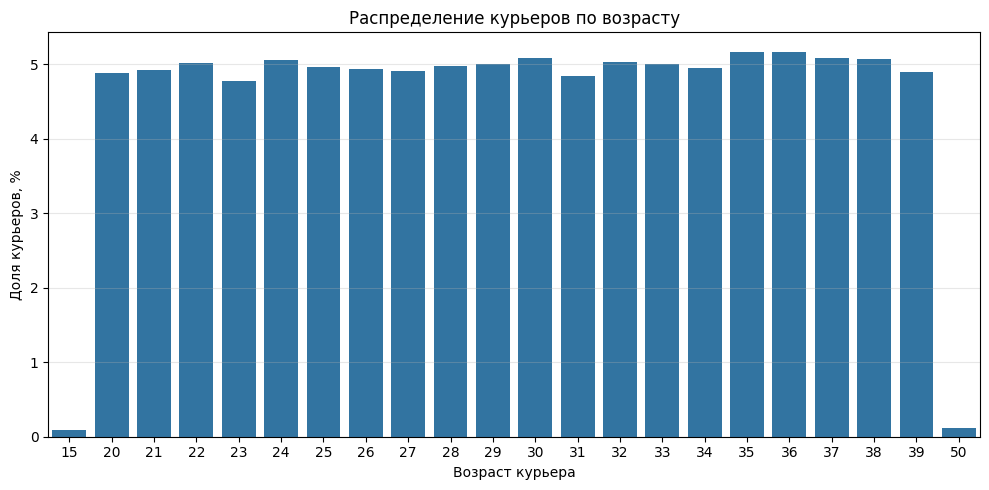

In [ ]:
# Возраст курьеров

deliver_age_df = (
    X['Delivery_person_Age']
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .rename('percent')
    .reset_index()
    .rename(columns={'index': 'Delivery_person_Age'})
)

deliver_age_df['Delivery_person_Age'] = deliver_age_df['Delivery_person_Age'].astype(int)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=deliver_age_df,
    x='Delivery_person_Age',
    y='percent'
)

plt.xlabel('Возраст курьера')
plt.ylabel('Доля курьеров, %')
plt.title("Распределение курьеров по возрасту")

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Видим, что курьеры в возрасте от 20 до 39 лет распределены примерно равномерно - почти 5% занимает каждая категория. Однако есть работники, которым всего по 15 - процент близок к нулю, или же наоборот - 50 лет, однако такая доля тоже крайне незначительна.

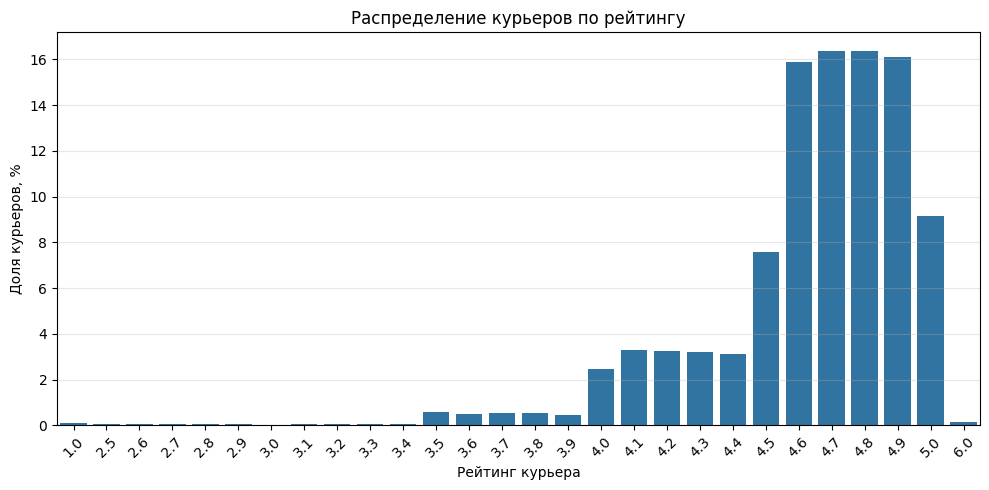

In [ ]:
# Рейтинг курьеров

rating_df = (
    X['Delivery_person_Ratings']
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .rename('percent')
    .reset_index()
    .rename(columns={'index': 'Delivery_person_Ratings'})
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=rating_df,
    x='Delivery_person_Ratings',
    y='percent'
)
plt.xlabel('Рейтинг курьера')
plt.ylabel('Доля курьеров, %')
plt.xticks(rotation=45)
plt.title('Распределение курьеров по рейтингу')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

Большинство рабочих имеют хороший рейтинг - 4.0 и выше, при этом большая доля сосредоточена именно в диапазоне от 4.5 до 5.0. Однако небольшое количество курьеров имеют достаточно низкий рейтинг - меньше процента в каждой категории от 3.5 до 3.9, и близкая к нулю доля курьеров с рейтингом от 1 до 3.4.

Кроме того, видим выброс - рейтинг не может быть равен 6 (у нас пятибалльная система)

In [ ]:
# Обрежем рейтинг до 5, чтобы избавиться от экстремальных значений
X['Delivery_person_Ratings'] = X['Delivery_person_Ratings'].clip(lower=1, upper=5)

In [ ]:

# Дата заказа

# Преобразуем дату в день и месяц (год у нас один)
X['Order_Date'] = pd.to_datetime(X['Order_Date'], format='%d-%m-%Y')
X['Order_Year'] = X['Order_Date'].dt.year
X['Order_Month'] = X['Order_Date'].dt.month
X['Order_Day'] = X['Order_Date'].dt.day

# Удалим столбец с датой
X.drop(columns=['Order_Date'], inplace=True)

In [ ]:
# В датасете представлен всего 1 год, признак будет константным, удалим его
X['Order_Year'].value_counts(normalize=True)

Order_Year
2022    1.0
Name: proportion, dtype: float64

In [ ]:
X.drop(columns=['Order_Year'], inplace=True)

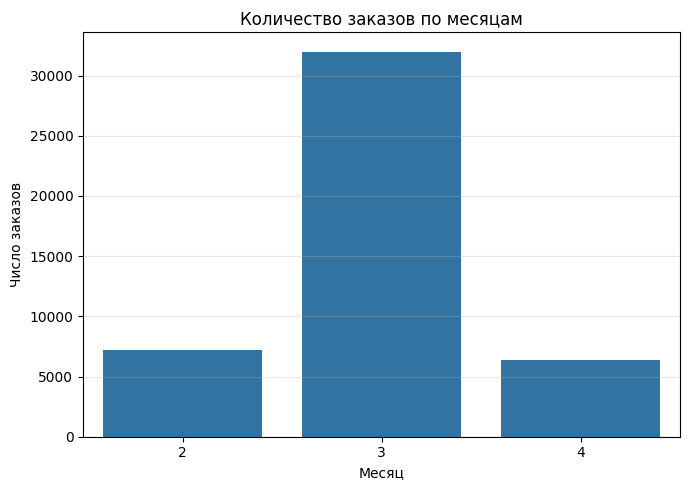

In [ ]:
plt.figure(figsize=(7, 5))

sns.countplot(
    data=X,
    x='Order_Month',
    order=sorted(X['Order_Month'].unique())
)
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

В нашем датасете собраны данные только за три месяца, при этом, большинство объектов сконцентрированы именно за 3 месяц. Скорее всего, 2 и 4 месяц не полностью попали в сроки сбора датасета, поэтому видим такой сильный дисбаланс.

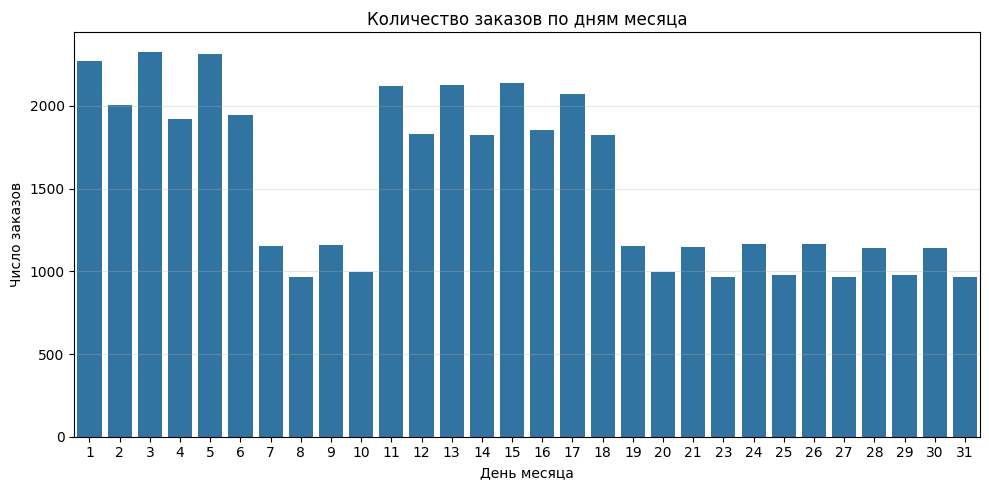

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data=X,
    x='Order_Day',
    order=sorted(X['Order_Day'].unique())
)
plt.title('Количество заказов по дням месяца')
plt.xlabel('День месяца')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Распределение по дню месяца имеет несколько уровней: в начале и середине месяца заказов больше, чем во второй половине. Однако вид распределения (очевидны чёткие «ступеньки») указывает, что данные, скорее всего, сгенерированы или сильно агрегированы, поэтому бизнес-интерпретацию делать нельзя.

В следующем разделе будем полезно рассмотреть другие признаки, основанные на этом - например, дни праздников, выходных, будней. Возможно, там мы получим более осмысленные результаты.

In [ ]:
# Время заказа и время принятия его курьером

# Переведем столбцы со временем оформления заказа и приемкой его курьером
# в правильный формат, добавим столбцы с часом и минутой заказа
X['Time_Ordered'] = pd.to_datetime(X['Time_Ordered'], format='%H:%M:%S', errors='coerce')
X['Time_Order_picked'] = pd.to_datetime(X['Time_Order_picked'], format='%H:%M:%S', errors='coerce')

X['Order_hour'] = X['Time_Ordered'].dt.hour
X['Order_minute'] = X['Time_Ordered'].dt.minute

X['Picked_hour'] = X['Time_Order_picked'].dt.hour
X['Picked_minute'] = X['Time_Order_picked'].dt.minute


X.drop(columns=['Time_Ordered', 'Time_Order_picked'], inplace=True)

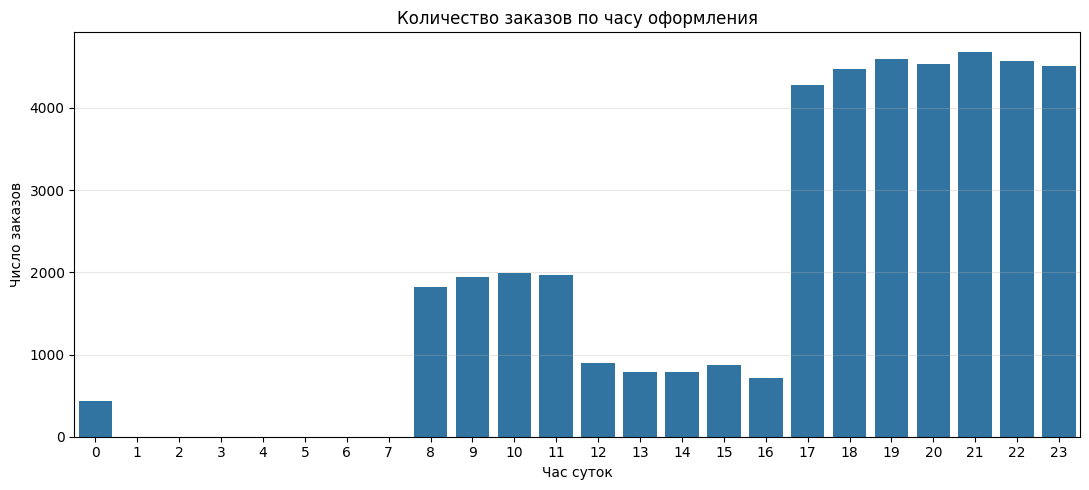

In [ ]:
hours = pd.Index(range(24), name='Order_hour')

# добавим в график даже те часы, в которые не было заказов, для наглядности
orders_by_hour = (
    X['Order_hour']
    .value_counts()
    .reindex(hours, fill_value=0)
    .rename('n_orders')
    .reset_index()
)

plt.figure(figsize=(11, 5))
sns.barplot(
    data=orders_by_hour,
    x='Order_hour',
    y='n_orders'
)

plt.title('Количество заказов по часу оформления')
plt.xlabel('Час суток')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)

plt.xticks(ticks=range(24), labels=range(24))

plt.tight_layout()
plt.show()

Распределение количества заказов по часу суток носит ступенчатый характер: заказы практически отсутствуют ночью (1-7 часов), имеют небольшой пик утром (8-11 часов), снижаются днём (12-16 часов) и достигают максимума в вечернее время (17-23 часов). Можно проследить некоторые закономерности: в ночное время сервис не работает - заказов нет, затем растет утренний спрос - люди заказывают еду на завтрак. К обеду количество заказов спадает - большинство на работе, однако к вечеру спрос снова растет. Однако вид распределения (почти ровные "ступеньки" в некоторые периоды, искусственное завышение или занижение заказов и удержание их на одном уровне) снова позволяет предположить, что данные либо сгенерированы искусственно, либо сильно агрегированы, поэтому интерпретировать его как "естественное" пользовательское поведение нужно аккуратно.

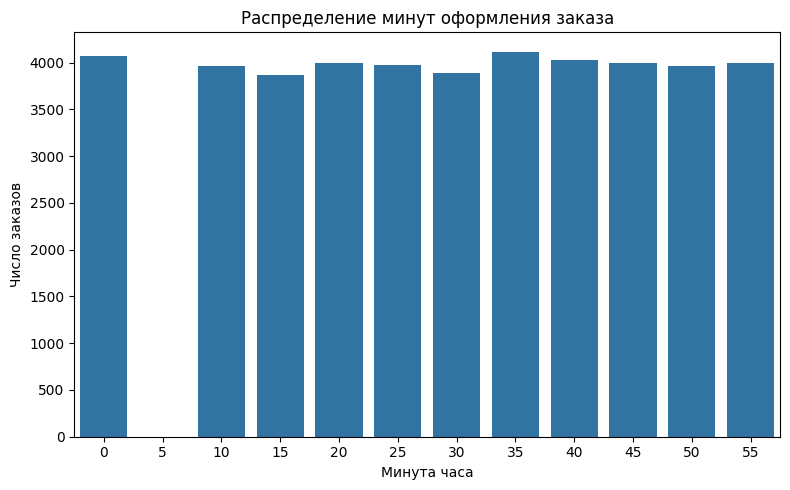

In [ ]:
minutes5 = pd.Index(range(0, 60, 5), name='Order_minute')

order_minute_counts = (
    X['Order_minute']
    .value_counts()
    .reindex(minutes5, fill_value=0)
    .rename('n_orders')
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=order_minute_counts,
    x='Order_minute',
    y='n_orders',
)

plt.title('Распределение минут оформления заказа')
plt.xlabel('Минута часа')
plt.ylabel('Число заказов')

plt.tight_layout()
plt.show()

Можем видеть, что количество заказов никак не зависит от минуты оформления: нет ярко выраженных пиков. Кроме того, пропущена каждая пятая минута заказа - возможно, при сборе данных был баг системы, и не заказы не учитывались в этот короткий промежуток

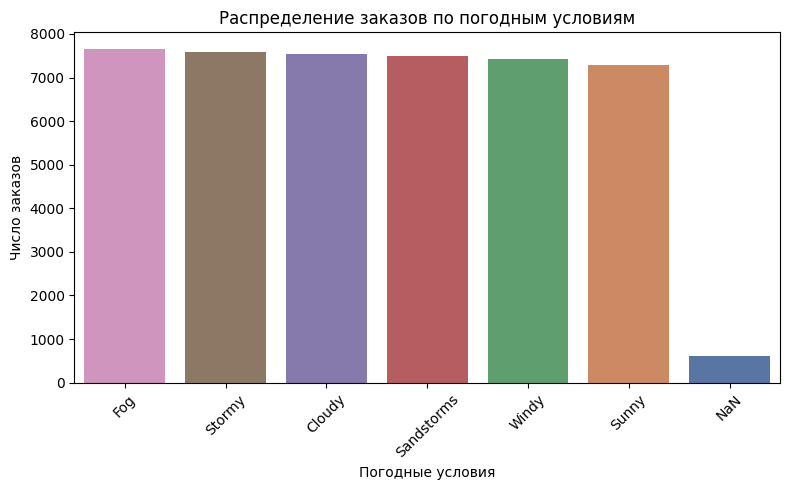

In [ ]:
# Погодные условия

# Уберем из значений слово conditions
X['Weather'] = X['Weather'].str.replace('conditions ', '', regex=False)

# Считаем количество заказов для каждого типа погоды
weather_counts = (
    X['Weather']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Weather', 'Weather': 'n_orders'})
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=weather_counts,
    x='n_orders',
    y='count',
    hue='count',
    palette='deep',
    legend=False
)

plt.title('Распределение заказов по погодным условиям')
plt.xlabel('Погодные условия')
plt.ylabel('Число заказов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Для всех типов погоды - Fog, Stormy, Cloudy, Sandstorms, Windy, Sunny, - количество заказов практически одинаковое (около 7-7.5 тыс. на каждое состояние). Это выглядит как искусственно сбалансированное распределение, а не как реальные данные: в обычной жизни "Sunny" и "Cloudy" встречались бы сильно чаще, чем "Sandstorms" (к тому же, мы рассматриваем данные всего за 3 месяца)

Кроме того, присутствуют и пропущенные значения, однако эта категория занимает очень маленькую долю от всех наблюдений.

Таким образом, видим, что датасет по погоде перебалансирован — не можем делать выводы о реальной структуре спроса по погоде.

Однако для дальнейших моделей признак Weather всё равно может быть полезен (от него могут зависеть другие признаки), но его частоты здесь не отражают реальность

In [ ]:
# Преобразуем NaN в понятный pandas'у формат в столбце с погодными условиями
X['Weather'] = X['Weather'].replace(r'(?i)^\s*nan\s*$', np.nan, regex=True)

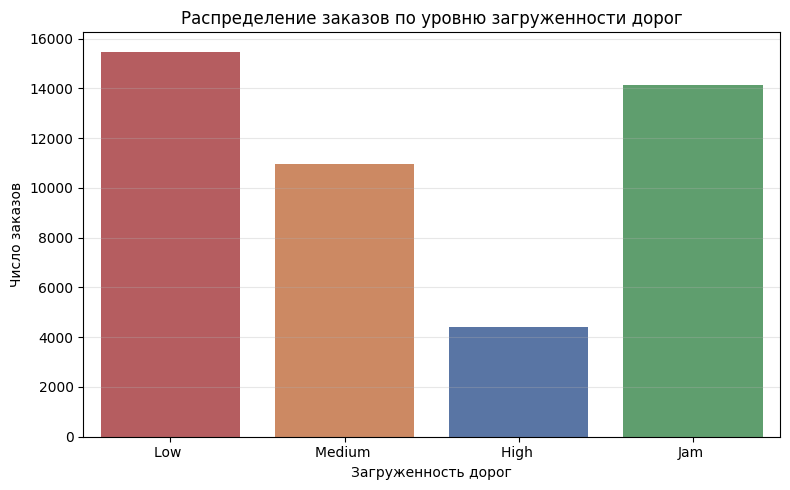

In [ ]:
# Городские пробки

traffic_df = (
    X['Road_traffic_density']
    .value_counts()
    .rename('n_orders')
    .reset_index()
    .rename(columns={'index': 'Road_traffic_density'})
)

# Нужный порядок категорий
order = ['Low ', 'Medium ', 'High ', 'Jam ']

plt.figure(figsize=(8, 5))
sns.barplot(
    data=traffic_df,
    x='Road_traffic_density',
    y='n_orders',
    order=order,
    hue='n_orders',
    palette='deep',
    legend=False
)

plt.title('Распределение заказов по уровню загруженности дорог')
plt.xlabel('Загруженность дорог')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Больше всего заказов приходится на участки с низкой загруженностью дорог и на сильные пробки, чуть меньше - при средней загруженности, существенно меньше заказов при высоком трафике. Так происходит, скорее всего, из-за того, что большая загруженность дорог быстро перерастает в сильные пробки в городах.


In [ ]:
# Преобразуем NaN в более удобный для работы формат
X['Road_traffic_density'] = X['Road_traffic_density'].replace(r'(?i)^\s*nan\s*$', np.nan, regex=True)

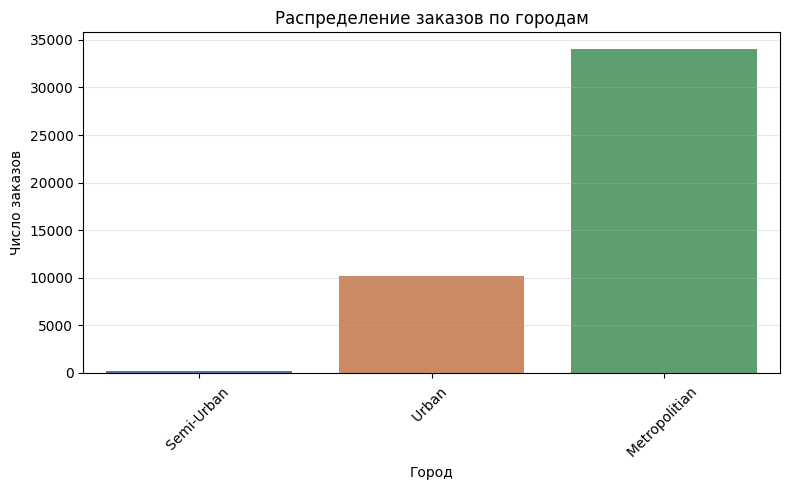

In [ ]:
# Тип города

city_df = (
    X['City']
    .value_counts()
    .rename('n_orders')
    .reset_index()
    .rename(columns={'index': 'City'})
)

order = ['Semi-Urban ', 'Urban ', 'Metropolitian ']

plt.figure(figsize=(8, 5))
sns.barplot(
    data=city_df,
    x='City',
    y='n_orders',
    order=order,
    hue='n_orders',
    palette='deep',
    legend=False
)

plt.title('Распределение заказов по городам')
plt.xlabel('Город')
plt.ylabel('Число заказов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Видим, что чаще всего заказывают в крупных городах - это неудивительно, там больше распространены похожие сервисы и культура

In [ ]:
# Преобразуем NaN в более удобный для работы формат
X['City'] = X['City'].replace(r'(?i)^\s*nan\s*$', np.nan, regex=True)

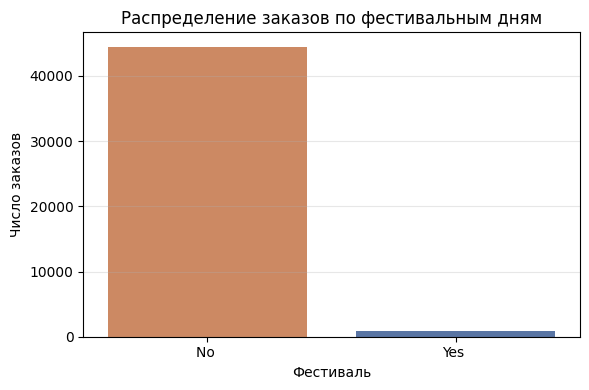

In [ ]:
# Наличие фестиваля в день заказа

fest_df = (
    X['Festival']
    .value_counts()
    .rename('n_orders')
    .reset_index()
    .rename(columns={'index': 'Festival'})
)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=fest_df,
    x='Festival',
    y='n_orders',
    hue='n_orders',
    palette='deep',
    legend=False
)

plt.title('Распределение заказов по фестивальным дням')
plt.xlabel('Фестиваль')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Заказы преобладают в дни без праздников, что в целом логично, ведь фестивали проходят не так часто

In [ ]:
# Преобразуем Yes или No в соответствующие булевые значения, заполним пропуски модой
X['Festival'] = X['Festival'].replace(r'(?i)^\s*nan\s*$', np.nan, regex=True)
mode_festival = X['Festival'].mode(dropna=True)[0]
X['Festival'] = X['Festival'].fillna(mode_festival)
X['Festival'] = X['Festival'].apply(lambda x: 1 if x == 'Yes ' else 0)

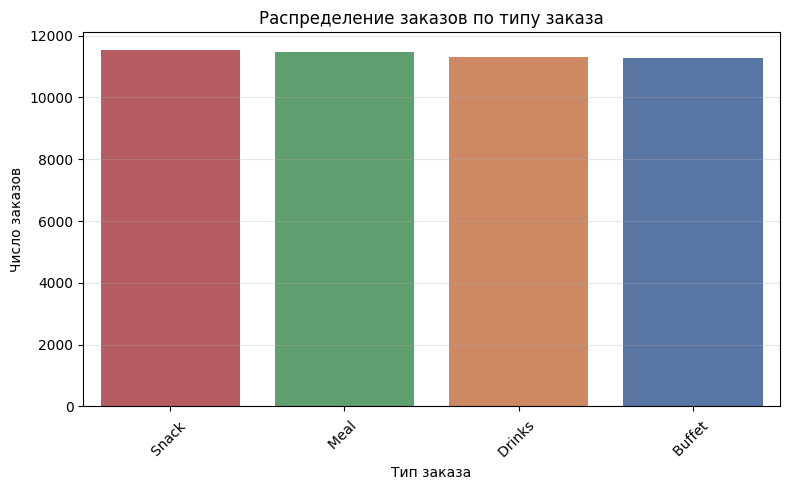

In [ ]:
# Типы заказов

order_type_df = (
    X['Type_of_order']
    .value_counts()
    .rename('n_orders')
    .reset_index()
    .rename(columns={'index': 'Type_of_order'})
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=order_type_df,
    x='Type_of_order',
    y='n_orders',
    hue='n_orders',
    palette='deep',
    legend=False
)

plt.title('Распределение заказов по типу заказа')
plt.xlabel('Тип заказа')
plt.ylabel('Число заказов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Типы заказов распределены почти равномерно, нет дисбаланса в каком-то классе. Отсутствуют пропущенные значения

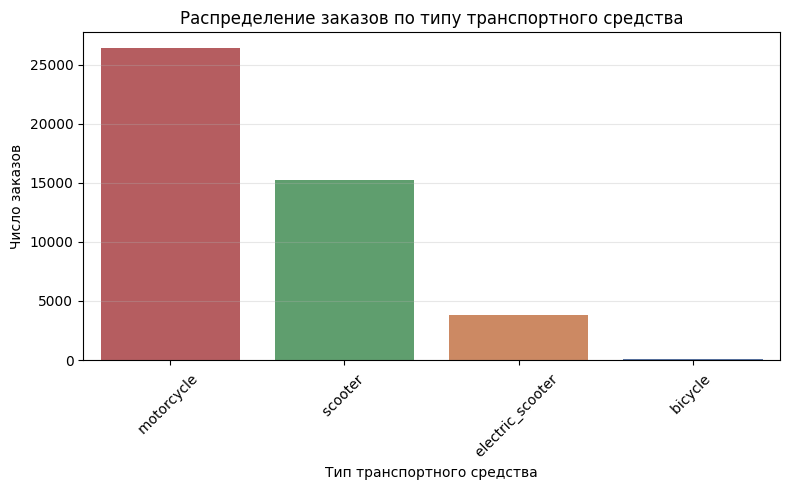

In [ ]:
# Тип транспортного средства

vehicle_df = (
    X['Type_of_vehicle']
    .value_counts()
    .rename('n_orders')
    .reset_index()
    .rename(columns={'index': 'Type_of_vehicle'})
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=vehicle_df,
    x='Type_of_vehicle',
    y='n_orders',
    hue='n_orders',
    palette='deep',
    legend=False
)

plt.title('Распределение заказов по типу транспортного средства')
plt.xlabel('Тип транспортного средства')
plt.ylabel('Число заказов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Практически все доставки осуществляются с помощью мотоцикла или скутера, а так как в городе очень часто больше пробки и заторы, скорость доставки может значительно снижаться. Кроме того, малая доля заказов была доставлена на велосипеде - скорее всего заказывали недалеко от ресторана.

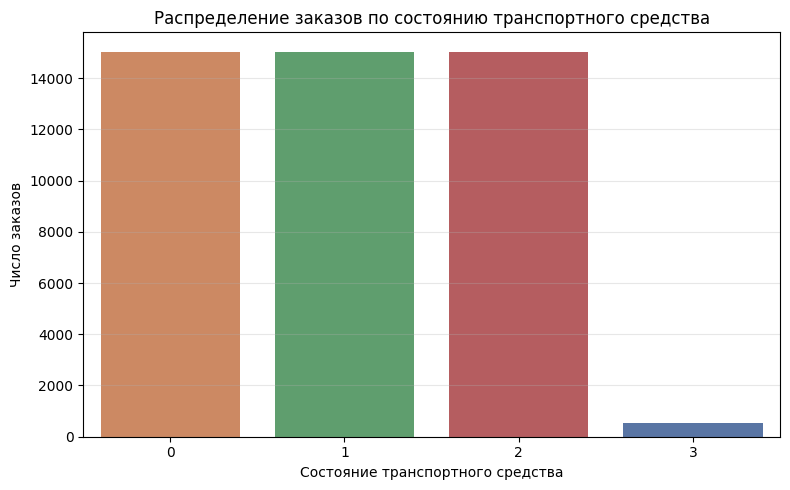

In [ ]:
# Состояние транспорта

vehicle_cond_df = (
    X['Vehicle_condition']
    .value_counts()
    .rename('n_orders')
    .reset_index()
    .rename(columns={'index': 'Vehicle_condition'})
    .sort_values('Vehicle_condition')
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=vehicle_cond_df,
    x='Vehicle_condition',
    y='n_orders',
    hue='n_orders',
    palette='deep',
    legend=False
)

plt.title('Распределение заказов по состоянию транспортного средства')
plt.xlabel('Состояние транспортного средства')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Большинство заказов были доставлены на транспортных средствах в хорошем состоянии (0, 1), однако часть заказов выполнена с помощью транспорта, не пригодного для поездок (состояние - 2, 3).

In [ ]:
X.head()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                 37.0                      4.9            22.745049   
1                 34.0                      4.5            12.913041   
2                 23.0                      4.4            12.914264   
3                 38.0                      4.7            11.003669   
4                 32.0                      4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude     Weather Road_traffic_density  \
0                    75.912471       Sunny                High    
1                    77.813237      Stormy                 Jam    
2                    77.688400  Sandstorms                 Low    
3                    77.026494       Sunny              Medium    
4                    80.289982      Cloudy                High    

   Vehicle_condition Type_of_order Type_of_vehicle  Multiple_deliveries  \
0                  2        Snack      motorcycle                   0.0   
1                  2        Snack         scooter                   1.0   
2                  0       Drinks      motorcycle                   1.0   
3                  0       Buffet      motorcycle                   1.0   
4                  1        Snack         scooter                   1.0   

   Festival            City  Order_Month  Order_Day  Order_hour  Order_minute  \
0         0          Urban             3         19        11.0          30.0   
1         0  Metropolitian             3         25        19.0          45.0   
2         0          Urban             3         19         8.0          30.0   
3         0  Metropolitian             4          5        18.0           0.0   
4         0  Metropolitian             3         26        13.0          30.0   

   Picked_hour  Picked_minute  
0           11             45  
1           19             50  
2            8             45  
3           18             10  
4           13             45

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  float64
 1   Delivery_person_Ratings      43685 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Weather                      44977 non-null  object 
 7   Road_traffic_density         44992 non-null  object 
 8   Vehicle_condition            45593 non-null  int64  
 9   Type_of_order                45593 non-null  object 
 10  Type_of_vehicle              45593 non-null  object 
 11  Multiple_deliveries          44600 non-null  float64
 12  Festival                     45593 non-null  int64  
 13  City            

Посмотрим на основные числовые характеристики датасета

In [ ]:
X.describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         43739.000000             43685.000000         45593.000000   
mean             29.567137                 4.632567            17.017729   
std               5.815155                 0.331560             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.500000            12.933284   
50%              30.000000                 4.700000            18.546947   
75%              35.000000                 4.900000            22.728163   
max              50.000000                 5.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.898497                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  Multiple_deliveries  \
count                 45593.000000       45593.000000         44600.000000   
mean                     70.845702           1.023359             0.744664   
std                      21.118812           0.839065             0.572473   
min                       0.010000           0.000000             0.000000   
25%                      73.280000           0.000000             0.000000   
50%                      76.002574           1.000000             1.000000   
75%                      78.107044           2.000000             1.000000   
max                      88.563452           3.000000             3.000000   

           Festival   Order_Month     Order_Day    Order_hour  Order_minute  \
count  45593.000000  45593.000000  45593.000000  43862.000000  43862.000000   
mean       0.019652      2.980699     13.811331     17.423966     29.559642   
std        0.138803      0.545906      8.708362      4.817856     16.607369   
min        0.000000      2.000000      1.000000      0.000000      0.000000   
25%        0.000000      3.000000      6.000000     15.000000     15.000000   
50%        0.000000      3.000000     13.000000     19.000000     30.000000   
75%        0.000000      3.000000     20.000000     21.000000     45.000000   
max        1.000000      4.000000     31.000000     23.000000     55.000000   

        Picked_hour  Picked_minute  
count  45593.000000   45593.000000  
mean      17.144759      28.604281  
std        5.326435      17.567400  
min        0.000000       0.000000  
25%       14.000000      15.000000  
50%       19.000000      30.000000  
75%       21.000000      45.000000  
max       23.000000      55.000000

Больше нет выбросов в наших данных

## 1.4. Взаимосвязи между признаками

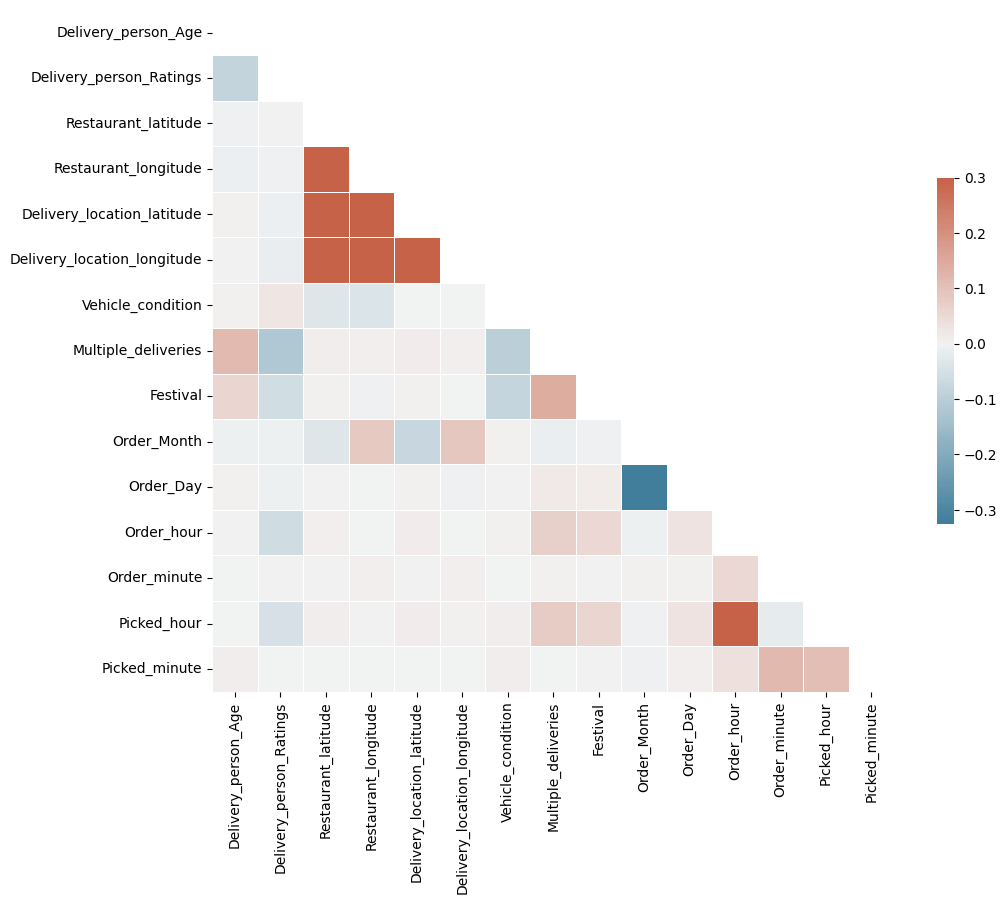

In [ ]:
# Корреляция признаков

numeric_cols = X.select_dtypes(include='number').columns
corr = X[numeric_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Как можем видеть, в датасете отсутствует сильная корреляция между признаками (больше 0.5 по модулю), однако есть небольшие зависимости. Координаты ресторана и места доставки коррелируют между собой, время заказа и время его приемки курьером так же связаны (это логично, курьер забирает каждый готовый заказ через примерно одинаковое время). Видим отрицательную корреляцию и между днем и месяцем заказа: в датасете у нас всего 3 месяца, тяжело обобщить на большой период

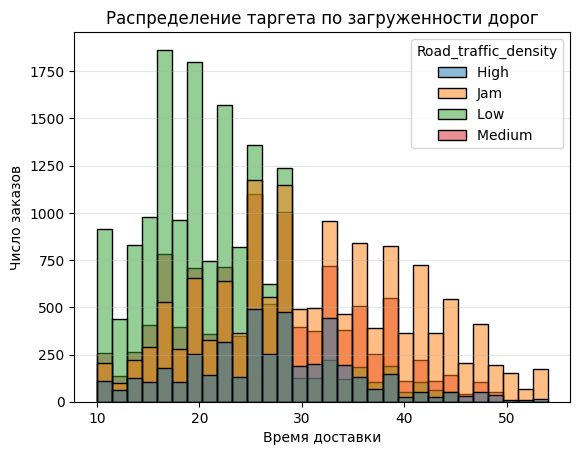

In [ ]:
tmp = pd.DataFrame({
    'target': y,
    'Road_traffic_density': X['Road_traffic_density'].values
})

sns.histplot(
    data=tmp,
    x='target',
    hue='Road_traffic_density',
    bins=30
)
plt.xlabel('Время доставки')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)
plt.title("Распределение таргета по загруженности дорог")
plt.show()

Время доставки (таргет) очень зависит от загруженности дорог, что довольно логично, так как многие курьеры используют мотоциклы и скутеры. Заказ доставляется примерно за 10-30 минут, если на дороге нет пробок, или больше 40, если большой затор

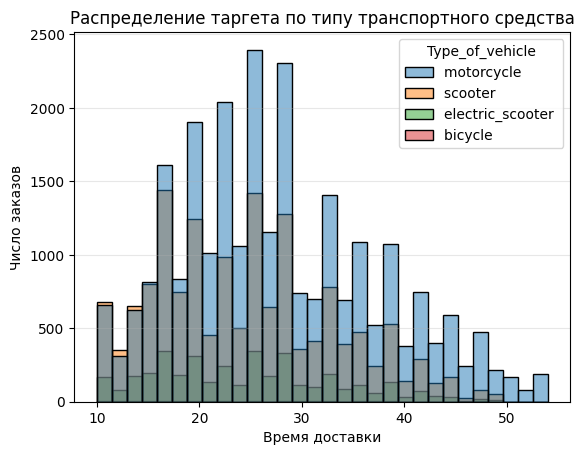

In [ ]:
tmp = pd.DataFrame({
    'target': y,
    'Type_of_vehicle': X['Type_of_vehicle'].values
})

sns.histplot(
    data=tmp,
    x='target',
    hue='Type_of_vehicle',
    bins=30
)
plt.title("Распределение таргета по типу транспортного средства")
plt.xlabel('Время доставки')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)
plt.show()

Заказы, которые находятся рядом с рестораном и занимают менее 15 минут, в равной мере доставляются с помощью мотоцикла или скутера, однако для более далеких заказов, курьеры все больше используют именно мотоциклы.

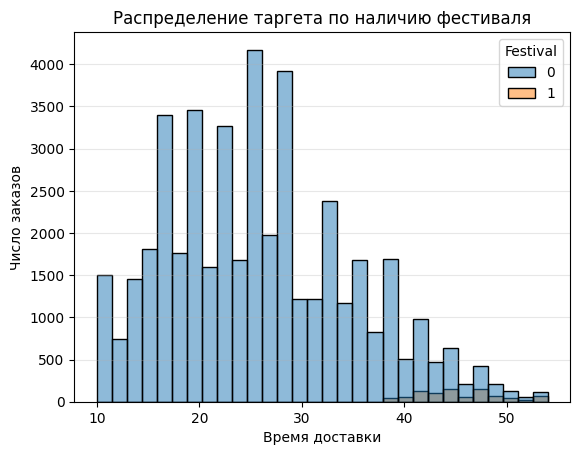

In [ ]:
tmp = pd.DataFrame({
    'target': y,
    'Festival': X['Festival'].values
})

sns.histplot(
    data=tmp,
    x='target',
    hue='Festival',
    bins=30
)

plt.title("Распределение таргета по наличию фестиваля")
plt.xlabel('Время доставки')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)
plt.show()

В дни фестивалей среднее время доставки сильно выше, чем в обычные дни: скорее всего на улицах большое количество машин, образуются пробки

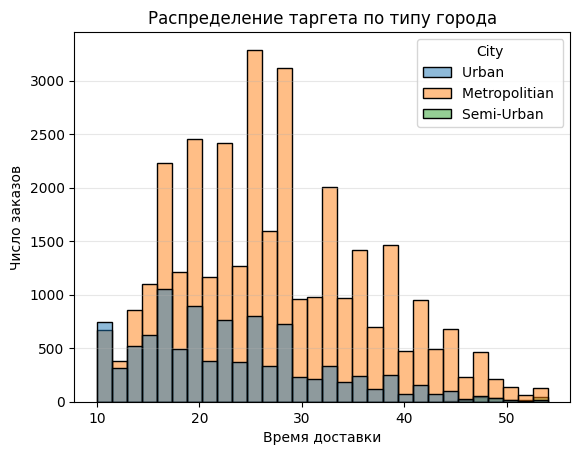

In [ ]:
tmp = pd.DataFrame({
    'target': y,
    'City': X['City'].values
})

sns.histplot(
    data=tmp,
    x='target',
    hue='City',
    bins=30
)

plt.title("Распределение таргета по типу города")
plt.xlabel('Время доставки')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)
plt.show()

По графику видно, что основная масса доставок по времени сосредоточена в диапазоне примерно 15-35 минут, причём больше всего заказов приходится на Metropolitan-города. При этом наблюдаем скошенность распределения вправо на Semi-Urban: именно там наблюдается наибольшее время доставки, то есть в полу-городские районы курьеры едут дольше всего.

Теперь посмотрим на распределение таргета

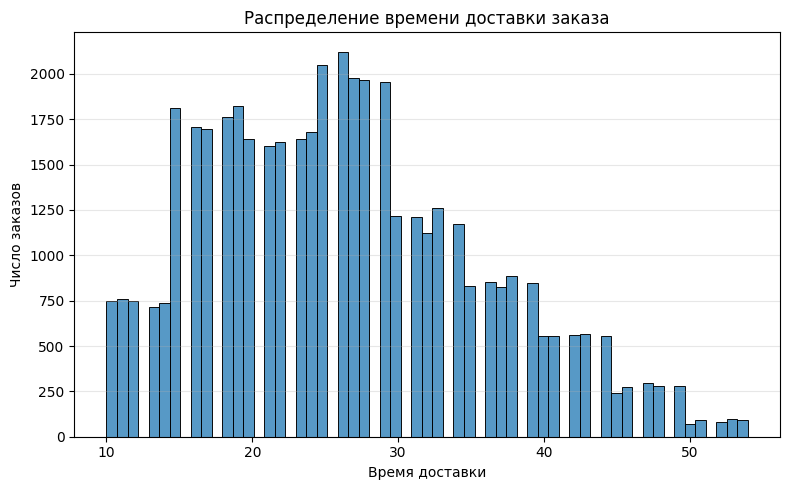

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y)

plt.title('Распределение времени доставки заказа')
plt.xlabel('Время доставки')
plt.ylabel('Число заказов')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

По графику видно, что распределение таргета близко к нормальному, но имеет небольшое смещение.

Наши данные имеют географические координаты, поэтому посмотрим на их расположение на карте мира

In [ ]:
import plotly.express as px


def plot_map(zoom=4):
    # Подготовка данных
    df_restaurants = X[['Restaurant_longitude', 'Restaurant_latitude']].copy()
    df_restaurants['Type'] = 'Ресторан'
    df_restaurants.columns = ['Longitude', 'Latitude', 'Type']

    df_deliveries = X[['Delivery_location_longitude', 'Delivery_location_latitude']].copy()
    df_deliveries['Type'] = 'Доставка'
    df_deliveries.columns = ['Longitude', 'Latitude', 'Type']

    df_map_data = pd.concat([df_restaurants, df_deliveries])
    df_map_data = df_map_data.drop_duplicates(subset=['Longitude', 'Latitude', 'Type'])
    # Удалим дубликаты, так как из одного ресторана может быть много доставок

    # Сама карта
    fig = px.scatter_mapbox(df_map_data,
                            lat="Latitude",
                            lon="Longitude",
                            color="Type",
                            zoom=zoom,
                            height=700,
                            title="Карта координат ресторанов и доставки"
                           )

    # Стиль и настройки карты
    fig.update_layout(
        mapbox_style="carto-positron",
        mapbox_center_lat = df_map_data['Latitude'].mean(),
        mapbox_center_lon = df_map_data['Longitude'].mean()
    )

    fig.show()

In [ ]:
plot_map(zoom=1)

Легко заметить явные ошибки: в координатах где-то ошибочно присутствует минус в долготе или широте, так как все координаты имеют в точности одинаковую формулу. Также в центре есть выбросы, так как координаты 0, 0 соответствуют Атлантическому океану.

In [ ]:
# Исправим координаты

coords = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
X[coords] = X[coords].abs()

mask = (X[coords] > 1).all(axis=1)
X = X[mask]
y = y[mask]

plot_map()

## 1.5. Построение Baseline

В качестве базовых моделей попробуем использовать следующие модели:
* Константное предсказание (Среднее значение)
* Линейная регрессия
* Решающее дерево
* Случайный лес
* Градиентный бустинг (CatBoost) - хотим зафиксировать митрики до генерации новых признаков и детекции аномалий

In [ ]:
!pip install catboost --quiet

In [ ]:
# Препроцессинг и пайплайны
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.base import clone

# Валидация
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_pinball_loss
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Инициализация датасета с результатами
results = pd.DataFrame(columns=['Model', 'R2', 'MAPE', 'Quantile_loss', 'RMSE'])

q = 0.75  # Будем штрафовать недооценку в 3 раза сильнее, чем переоценку

# Определим числовые и категориальные признаки
numeric_features = X.select_dtypes(['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes('object').columns.tolist()

In [ ]:
# Константное предсказание (Среднее значение)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
mape_scores = []
quantile_scores = []
rmse_scores = []

for train_idx, test_idx in cv.split(y):
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    y_pred = np.full_like(y_test, y_train.mean())

    r2_scores.append(r2_score(y_test, y_pred))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
    quantile_scores.append(mean_pinball_loss(y_test, y_pred, alpha=q))
    rmse_scores.append(root_mean_squared_error(y_test, y_pred))

results.loc[len(results)] = ["Constant (Mean)",
                             round(np.mean(r2_scores), 2),
                             round(np.mean(mape_scores), 2),
                             round(np.mean(quantile_scores), 2),
                             round(np.mean(rmse_scores), 2)]

results

Model   R2  MAPE  Quantile_loss  RMSE
0  Constant (Mean) -0.0  0.34           3.86  9.39

In [ ]:
# Вспомогательная функция для обучения и валидации моделей
def train_validate_model(pipeline, X, y, n_splits=5):
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    metrics = {
        'r2': [],
        'mape': [],
        'quantile': [],
        'rmse': []
    }

    for train_idx, test_idx in cv.split(y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = clone(pipeline)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        metrics['r2'].append(r2_score(y_test, y_pred))
        metrics['mape'].append(mean_absolute_percentage_error(y_test, y_pred))
        metrics['quantile'].append(mean_pinball_loss(y_test, y_pred, alpha=q))
        metrics['rmse'].append(root_mean_squared_error(y_test, y_pred))

    return metrics

In [ ]:
# Подготовим препроцессор для признаков
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
    ])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop='first'))
    ])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
    ])

In [ ]:
# Линейная регрессия

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])

metrics = train_validate_model(pipeline, X, y)

results.loc[len(results)] = [
    'Linear Regression',
    round(np.mean(metrics['r2']), 2),
    round(np.mean(metrics['mape']), 2),
    round(np.mean(metrics['quantile']), 2),
    round(np.mean(metrics['rmse']), 2),
]

results

Model    R2  MAPE  Quantile_loss  RMSE
0    Constant (Mean) -0.00  0.34           3.86  9.39
1  Linear Regression  0.58  0.21           2.41  6.06

In [ ]:
# Решающее дерево

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

metrics = train_validate_model(pipeline, X, y)

results.loc[len(results)] = [
    'Decision Tree',
    round(np.mean(metrics['r2']), 2),
    round(np.mean(metrics['mape']), 2),
    round(np.mean(metrics['quantile']), 2),
    round(np.mean(metrics['rmse']), 2),
]

results

Model    R2  MAPE  Quantile_loss  RMSE
0    Constant (Mean) -0.00  0.34           3.86  9.39
1  Linear Regression  0.58  0.21           2.41  6.06
2      Decision Tree  0.49  0.21           2.51  6.72

In [ ]:
# Случайный лес

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])


metrics = train_validate_model(pipeline, X, y)

results.loc[len(results)] = [
    'Random Forest',
    round(np.mean(metrics['r2']), 2),
    round(np.mean(metrics['mape']), 2),
    round(np.mean(metrics['quantile']), 2),
    round(np.mean(metrics['rmse']), 2),
]

results

In [ ]:
# Градиентный бустинг (CatBoost)
X_cb = X.copy()
X_cb[categorical_features] = X_cb[categorical_features].fillna("missing")


model = CatBoostRegressor(random_state=42,
                          cat_features=categorical_features,
                          verbose=250)


metrics = train_validate_model(model, X_cb, y)

results.loc[len(results)] = [
    'CatBoostRegressor',
    round(np.mean(metrics['r2']), 2),
    round(np.mean(metrics['mape']), 2),
    round(np.mean(metrics['quantile']), 2),
    round(np.mean(metrics['rmse']), 2),
]

results

Learning rate set to 0.071329
0:	learn: 9.0204365	total: 80.8ms	remaining: 1m 20s
250:	learn: 4.5487855	total: 7.65s	remaining: 22.8s
500:	learn: 4.3031791	total: 15.2s	remaining: 15.2s
750:	learn: 4.1476391	total: 22.1s	remaining: 7.33s
999:	learn: 4.0426501	total: 30s	remaining: 0us
Learning rate set to 0.071329
0:	learn: 9.0169912	total: 33ms	remaining: 33s
250:	learn: 4.6327748	total: 6.68s	remaining: 19.9s
500:	learn: 4.3643599	total: 14.3s	remaining: 14.2s
750:	learn: 4.2101430	total: 22.1s	remaining: 7.32s
999:	learn: 4.1051454	total: 29s	remaining: 0us
Learning rate set to 0.071329
0:	learn: 9.0351748	total: 32.5ms	remaining: 32.4s
250:	learn: 4.5361100	total: 7.74s	remaining: 23.1s
500:	learn: 4.2741119	total: 15.3s	remaining: 15.2s
750:	learn: 4.1203634	total: 22.1s	remaining: 7.34s
999:	learn: 4.0199087	total: 30s	remaining: 0us
Learning rate set to 0.071329
0:	learn: 9.0625622	total: 29.7ms	remaining: 29.7s
250:	learn: 4.5116563	total: 6.47s	remaining: 19.3s
500:	learn: 4.2

Model    R2  MAPE  Quantile_loss  RMSE
0    Constant (Mean) -0.00  0.34           3.86  9.39
1  Linear Regression  0.58  0.21           2.41  6.06
2      Decision Tree  0.49  0.21           2.51  6.72
3      Random Forest  0.73  0.16           1.88  4.85
4  CatBoostRegressor  0.80  0.15           1.68  4.22

**Анализ результатов**

По данной таблице видно, что среди базовых моделей лучшими по всем метрикам оказались случайный и градиентный бустинг. Даже без каких-либо преобразований CatBoostRegressor показал отличное качество, которое далее мы будем улучшать.

# 2. Работа с пропущенными значениями, аномалиями и генерация признаков

## 2.0. Описание этапа

На данном этапе выполняется обработка аномалий и построение новых признаков (feature engineering). Сначала определяются и анализируются различные типы аномалий в данных - пропуски, выбросы, некорректные или противоречивые значения.
Также проводится генерация информативных признаков, которые могут повысить качество последующих моделей. Это включает создание производных и агрегированных признаков, кодирование категориальных переменных и другие методы. Цель этапа - подготовить чистый, обогащённый и структурированный набор данных, максимально пригодный для построения эффективных моделей.

## 2.1. Работа с пропущенными значениями, аномалиями и выбросами

### 2.1.1. Заполнение пропущенных значений

В предыдущем блоке мы уже заполняли пропущенные значения с помощью медианы/моды для оценки метрик на бейзлайн-моделях. На этом этапе заполним NaN другим способом, стараясь лучше сохранить исходную структуру данных

Оценим количество пропусков по каждому признаку, и сколько процентов они составляют от общего количества данных

In [ ]:
# Cчитаем пропуски
n_missing = X.isna().sum()
missing_percent = X.isna().mean() * 100

missing_df = (
    pd.DataFrame({
        'feature': X.columns,
        'n_missing': n_missing.values,
        'missing_percent': missing_percent.values.round(2)
    })
    .query('n_missing > 0')
    .sort_values('missing_percent', ascending=False)
    .reset_index(drop=True)
)

missing_df.style.format({'missing_percent': '{:.2f}%'})

Больше всего пропусков видим в фичах `Delivery_person_Ratings`, `Delivery_person_Age`, `Order_hour`, `Order_minute`, `City`, `Multiple_deliveries` - 2-4% от всего количества данных. Используем KNNImputer для числовых признаков, где большое количество пропусков, и моду для категориальных (там не так много NaN)

In [ ]:
from sklearn.impute import KNNImputer


# Заполним сначала числовые признаки с помощью KNNImputer
num_knn_features = ['Delivery_person_Ratings', 'Delivery_person_Age',
                    'Order_hour', 'Order_minute']

imputer = KNNImputer(n_neighbors=5, weights='distance')

X[num_knn_features] = imputer.fit_transform(X[num_knn_features])

X['Order_hour'] = X['Order_hour'].round().astype(int)
X['Order_minute'] = X['Order_minute'].round().astype(int)

In [ ]:
# Заполним модой пропуски для категориальных признаков
cat_simple_features = ['City', 'Multiple_deliveries', 'Weather', 'Road_traffic_density']

for col in cat_simple_features:
    mode_value = X[col].mode(dropna=True)[0]
    X[col] = X[col].fillna(mode_value)

### 2.1.2. Поиск и анализ аномалий

Для начала попробуем использовать статистические методы нахождения аномалий (IQR, Z-score)

In [ ]:
# Вспомогательная функция для IQR
def count_anomalies_iqr(data):
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna()

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"Найдено {len(outliers)} аномалий")

Рассмотрим признак "Delivery_person_Age" и попробуем найти у него аномалии с помощью IQR

Найдено 46 аномалий


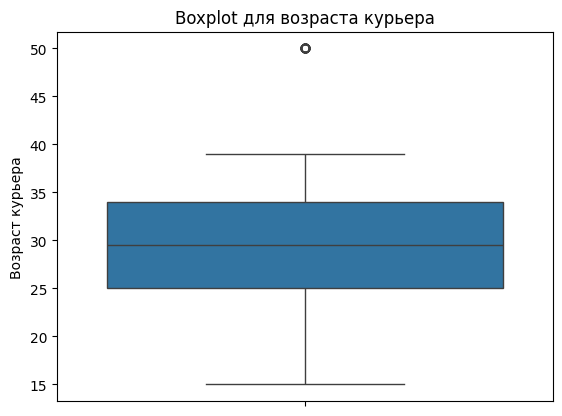

In [ ]:
data = X['Delivery_person_Age']
count_anomalies_iqr(data)
sns.boxplot(y=data)
plt.title('Boxplot для возраста курьера')
plt.ylabel('Возраст курьера')
plt.show()

Видим, что есть несколько курьеров с возрастом 50 лет, при этом полностью отсутсвуют курьеры с возрастом от 40 до 49 лет. Далее создадим новый признак и пометим эти точки как аномалии.

Рассмотрим также признак "Delivery_person_Ratings" и попробуем найти у него аномалии с помощью IQR

Найдено 2271 аномалий


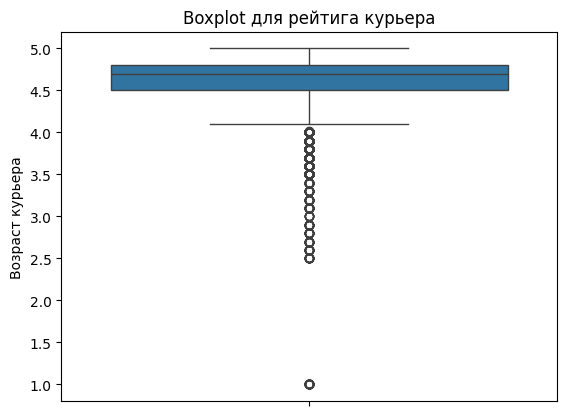

In [ ]:
data = X['Delivery_person_Ratings']
count_anomalies_iqr(data)
sns.boxplot(y=data)
plt.title('Boxplot для рейтига курьера')
plt.ylabel('Возраст курьера')
plt.show()

Метод пометил большое количество точек как выбросы, но по графику можно сказать, что таковыми они не являются. Вероятно это произошло из-за того, что оценки у служб доставки смещены и низких оценок очень мало. Увидим это на графике ниже:

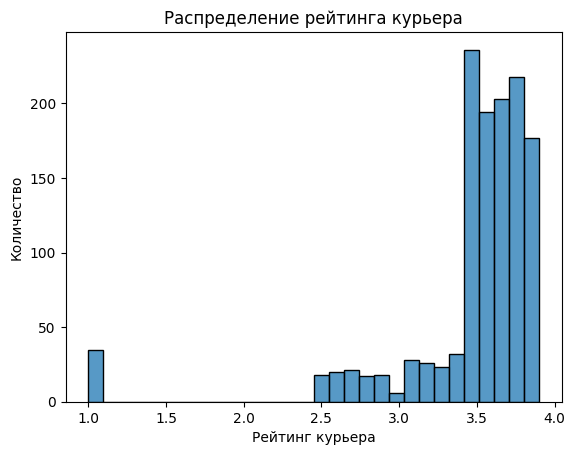

In [ ]:
sns.histplot(data=data[data < 4], bins=30)
plt.xlabel("Рейтинг курьера")
plt.ylabel("Количество")
plt.title("Распределение рейтинга курьера")
plt.show()

Как мы можем видеть, существует довольно большое количество курьеров с оценкой 1, в нашем случае можно сделать предположение, что таким рейтингом могут обладать новые курьеры, так как не существует курьеров с оценкой 0. Никак менять эти данные не будем, однако выделим курьеров со средним рейтингом 1 в отдельную категорию


In [ ]:
# Вспомогательная функция для Z-score
def count_anomalies_zscore(data):
    z_scores = zscore(data)
    outliers_z = np.where(np.abs(z_scores) > 3)[0]
    print(f"Найдено {len(outliers_z)} аномалий")
    return data.iloc[outliers_z]

Рассмотрим cнова признак "Delivery_person_Age" и попробуем найти у него аномалии теперь с помощью Z-score

In [ ]:
a = count_anomalies_zscore(X['Delivery_person_Age'])
a.describe()

Найдено 46 аномалий


count    46.0
mean     50.0
std       0.0
min      50.0
25%      50.0
50%      50.0
75%      50.0
max      50.0
Name: Delivery_person_Age, dtype: float64

Данный метод (Z-score) определил те же аномалии, что и IQR.

Рассмотрим cнова признак "Delivery_person_Ratings" и попробуем найти у него аномалии теперь с помощью Z-score

In [ ]:
a = count_anomalies_zscore(X['Delivery_person_Ratings'])
a.describe()

Найдено 674 аномалий


count    674.000000
mean       3.242730
std        0.607151
min        1.000000
25%        3.200000
50%        3.500000
75%        3.600000
max        3.600000
Name: Delivery_person_Ratings, dtype: float64

Z-score нашел меньшее количество выбросов за счёт более широкой границы, однако проблема остается прежней: есть курьеры с просто низким рейтингом, а есть курьеры с рейтингом в точности равным 1

### 2.1.3. Построение признаков на основе аномалий

In [ ]:
X['Delivery_person_Ratings_anomaly'] = (X['Delivery_person_Ratings'] == 1).astype(int)
X['Delivery_person_Age_anomaly'] = (X['Delivery_person_Age'] == 50).astype(int)

### 2.1.4. ML-методы для поиска сложных выбросов


Будем использовать Isolation Forest для определения выбросов и визуализируем их с помощью PCA

Найдено аномалий: 420 из 41953


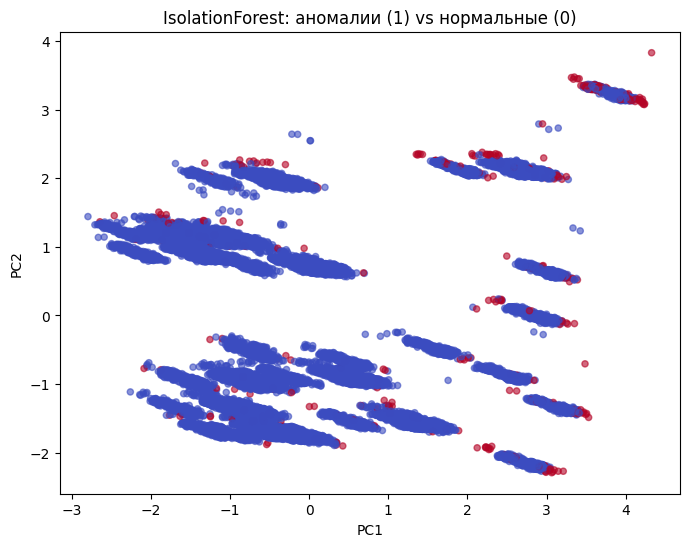

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA


X_without_cats = X.drop(categorical_features, axis=1)

scaler = StandardScaler()
X_without_cats_scaled = scaler.fit_transform(X_without_cats)

iso = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination=0.01,
    random_state=42,
    n_jobs=-1
)
iso.fit(X_without_cats_scaled)

X_without_cats['is_outlier'] = iso.predict(X_without_cats_scaled)
X_without_cats['is_outlier'] = X_without_cats['is_outlier'].map({1: 0, -1: 1})

n_outliers = X_without_cats['is_outlier'].sum()
print(f'Найдено аномалий: {n_outliers} из {len(X_without_cats)}')

pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_without_cats_scaled)
plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=X_without_cats['is_outlier'], cmap='coolwarm', alpha=0.6, s=20)
plt.title('IsolationForest: аномалии (1) vs нормальные (0)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Анализ графика**

Как и ожидалось, модель выделила 1% объектов как аномалии, однако не все являются таковыми. Большинство красных точек на графике - только лишь граничные точки кластеров, больше нас интересуют изолированные - те, которые находятся вдали от больших групп. Такие есть, а некоторые из них даже образуют небольшие группы, однако это не позволяет нам точно определить, являются ли они выбросами, так как PCA только с двумя компонентами не показывает нам полную структуру.

## 2.2. Генерация признаков и отбор переменных

### 2.2.1. Обработка категориальных переменных

Обработка категориальных признаков - это важная часть работы при работе с линейными и метрическими моделями. По результатам baseline мы приняли решение о том, что далее в нашем проекте мы будем использовать CatBoost, который сам обрабатывает категориальные признаки. Поэтому мы написали код, который декодирует категориальные признаки, но использовать мы его не будем (все кодировки будут на скопированном датасете)

In [ ]:
X_cat = X.copy()

Закодируем признак Weather с помощью LabelEncoding, так как у значений признака есть некий порядок и их можно сравнивать (>, <, =). Например, солнечная погода лучше подходит для доставок, следовательно и время от начала до конца заказа будет меньше, чем в туман или песчаную бурю

In [ ]:
# Преобразуем Weather в ординальную переменную
weather_mapping = {
    'Sunny': 0,
    'Cloudy': 1,
    'Fog': 2,
    'Windy': 3,
    'Sandstorms': 4,
    'Stormy': 5
}

X_cat['Weather'] = X_cat['Weather'].map(weather_mapping)

Закодируем признак Road_traffic_density также с помощью LabelEncoding, так как у значений признака тоже есть некий порядок и их можно сравнивать (>, <, =). 0 - малое количество пробок, свободная дорога, однако 3 - затор на улице

In [ ]:
# Преобразуем Road_traffic_density в ординальную переменную
traffic_mapping = {
    'Low ': 0,
    'Medium ': 1,
    'High ': 2,
    'Jam ': 3
}

X_cat['Road_traffic_density'] = X_cat['Road_traffic_density'].map(traffic_mapping)

У признаков Type_of_vehicle, Type_of_order и City предположения о порядке сделать не получится, поэтому закодируем их с помощью OHE и TargetEncoding

In [ ]:
# Сделаем One-Hot Encoding над Type_of_vehicle и Type_of_order
X_cat = pd.get_dummies(X_cat, columns=['Type_of_vehicle', 'Type_of_order'], drop_first=True)

In [ ]:
# Сделаем TargetEncoding над City
X_cat['Order_time'] = pd.to_datetime({
    'year': 2023,
    'month': X_cat['Order_Month'],
    'day': X_cat['Order_Day'],
    'hour': X_cat['Order_hour'],
    'minute': X_cat['Order_minute']
})

X_cat['orig_index'] = X_cat.index

X_cat = X_cat.sort_values('Order_time').reset_index(drop=True)

X_cat['Target'] = y.loc[X_cat['orig_index']].values
X_cat['City'] = X_cat.groupby('City')['Target'].transform(
    lambda s: s.shift().expanding().mean()
)
X_cat['City'] = X_cat['City'].fillna(y.mean())

X_cat = X_cat.sort_values('orig_index').reset_index(drop=True)

X_cat = X_cat.drop(columns=['Target', 'Order_time', 'orig_index'])

### 2.2.2. Генерация контекстных признаков

Добавим достаточно очевидный признак для нашей задачи: расстояние от ресторана до точки доставки. Используем две вариации: формула Хаверсина и L1-расстояние.

In [ ]:
# Расстояние по формуле Хаверсина
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Радиус Земли в километрах

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Манхэттенское расстояние
def manhattan_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Радиус Земли в километрах

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # 1 градус широты ~ 111 км
    # 1 градус долготы ~ cos(средняя широта) * 111 км
    avg_lat_rad = (lat1_rad + lat2_rad) / 2
    dlat_km = np.abs(lat2_rad - lat1_rad) * R
    dlon_km = np.abs(lon2_rad - lon1_rad) * R * np.cos(avg_lat_rad)

    return dlat_km + dlon_km

X['Distance_km_haversine'] = X.apply(lambda row: haversine_distance(
    row['Restaurant_latitude'], row['Restaurant_longitude'],
    row['Delivery_location_latitude'], row['Delivery_location_longitude']
), axis=1)

X['Distance_km_manhattan'] = X.apply(lambda row: manhattan_distance(
    row['Restaurant_latitude'], row['Restaurant_longitude'],
    row['Delivery_location_latitude'], row['Delivery_location_longitude']
), axis=1)

X[['Distance_km_manhattan', 'Distance_km_haversine']]

Distance_km_manhattan  Distance_km_haversine
0                   4.274704               3.025149
1                  28.541437              20.183530
2                   2.195751               1.552758
3                  11.016813               7.790401
4                   8.781723               6.210138
...                      ...                    ...
45587              23.454674              16.600272
45588               2.103519               1.489846
45590               6.585708               4.657195
45591               8.813553               6.232393
45592              17.060118              12.074396

[41953 rows x 2 columns]

Полезной может быть информация о среднем числе заказов из данного ресторана в данный день и час, добавим такие признаки

In [ ]:
# Выделение уникальных ресторанов на основе их координат
X['Restaurant_ID'] = X['Restaurant_latitude'].astype(str) + '_' + X['Restaurant_longitude'].astype(str)

hourly_avg = (
    X.groupby(['Restaurant_ID', 'Order_hour'])
     .size()
     .reset_index(name='Restaurant_hourly_avg_load')
)
daily_avg = (
    X.groupby(['Restaurant_ID', 'Order_Day'])
     .size()
     .reset_index(name='Restaurant_daily_avg_load')
)

X = X.merge(hourly_avg, on=['Restaurant_ID', 'Order_hour'], how='left')
X = X.merge(daily_avg, on=['Restaurant_ID', 'Order_Day'], how='left')

print("Количество ресторанов:", X['Restaurant_ID'].nunique())
X = X.drop(columns=['Restaurant_ID']) # Удаляем вспомогательное ID

X.head()

Количество ресторанов: 388


Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                 37.0                      4.9            22.745049   
1                 34.0                      4.5            12.913041   
2                 23.0                      4.4            12.914264   
3                 38.0                      4.7            11.003669   
4                 32.0                      4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude     Weather Road_traffic_density  \
0                    75.912471       Sunny                High    
1                    77.813237      Stormy                 Jam    
2                    77.688400  Sandstorms                 Low    
3                    77.026494       Sunny              Medium    
4                    80.289982      Cloudy                High    

   Vehicle_condition Type_of_order  ... Order_hour  Order_minute  Picked_hour  \
0                  2        Snack   ...         11            30           11   
1                  2        Snack   ...         19            45           19   
2                  0       Drinks   ...          8            30            8   
3                  0       Buffet   ...         18             0           18   
4                  1        Snack   ...         13            30           13   

  Picked_minute  Delivery_person_Ratings_anomaly  Delivery_person_Age_anomaly  \
0            45                                0                            0   
1            50                                0                            0   
2            45                                0                            0   
3            10                                0                            0   
4            45                                0                            0   

   Distance_km_haversine  Distance_km_manhattan  Restaurant_hourly_avg_load  \
0               3.025149               4.274704                           4   
1              20.183530              28.541437                          22   
2               1.552758               2.195751                           8   
3               7.790401              11.016813                          13   
4               6.210138               8.781723                           3   

   Restaurant_daily_avg_load  
0                          5  
1                          5  
2                          5  
3                         10  
4                          4  

[5 rows x 26 columns]

### 2.2.3. Добавление признаков, основанных на ближайших соседях

Можно предположить, что у курьеров с одинаковыми характеристиками (возраст, рейтинг) может быть похожее время доставки. Поэтому добавим в данные признак - среднее время доставки среди похожих курьеров.

In [ ]:
from sklearn.neighbors import NearestNeighbors


knn_features = ['Delivery_person_Age', 'Delivery_person_Ratings']
n_neighbors = 5

X_features = X[knn_features].values
y_values = y.values

nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1)
nbrs.fit(X_features)

_, indices = nbrs.kneighbors(X_features)

avg_knn_time = np.zeros(len(X))
for i in range(len(X)):
    neighbors_idx = indices[i][indices[i] != i][:n_neighbors]
    avg_knn_time[i] = y_values[neighbors_idx].mean()

X['avg_time_knn_delivery_person'] = avg_knn_time

Также, можно предположить, что у заказов с похожими характеристиками (Расстояние, координаты) может быть похожее время доставки.

In [ ]:
knn_features = ['Distance_km_haversine', 'Distance_km_manhattan',
                'Restaurant_latitude', 'Restaurant_longitude',
                'Delivery_location_latitude', 'Delivery_location_longitude']
n_neighbors = 5

X_features = X[knn_features].values
y_values = y.values

nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1)
nbrs.fit(X_features)

_, indices = nbrs.kneighbors(X_features)

avg_knn_time = np.zeros(len(X))
for i in range(len(X)):
    neighbors_idx = indices[i][indices[i] != i][:n_neighbors]
    avg_knn_time[i] = y_values[neighbors_idx].mean()

X['avg_time_knn_order'] = avg_knn_time

Примечание: В данной реализации может возникать утечка данных, так как метод использует будущие наблюдения.

### 2.2.4. Обработка временных признаков

Добавим признак, показывающий разницу между временем создания заказа и его приемкой курьером

In [ ]:
# Время от заказа до приёмки в минутах
X['Order_minutes_from_midnight'] = X['Order_hour'] * 60 + X['Order_minute']
X['Order_picked_minutes_from_midnight'] = X['Picked_hour'] * 60 + X['Picked_minute']
X['Pickup_delay_min'] = (X['Order_picked_minutes_from_midnight'] - X['Order_minutes_from_midnight'])

X['Pickup_delay_min'] = X['Pickup_delay_min'].clip(lower=0)

Добавим синус и косинус ко времени заказа и приемке курьером

In [ ]:
minutes_in_day = 24 * 60

# Время оформления заказа
X['Order_time_sin'] = np.sin(2 * np.pi * X['Order_minutes_from_midnight'] / minutes_in_day)
X['Order_time_cos'] = np.cos(2 * np.pi * X['Order_minutes_from_midnight'] / minutes_in_day)

# Время приёмки курьером
X['Picked_time_sin'] = np.sin(2 * np.pi * X['Order_picked_minutes_from_midnight'] / minutes_in_day)
X['Picked_time_cos'] = np.cos(2 * np.pi * X['Order_picked_minutes_from_midnight'] / minutes_in_day)

А также циклическое кодирование через синус и косинус для месяца и дня заказа

In [ ]:
# Цикл по месяцу заказа
X['Order_month_sin'] = np.sin(2 * np.pi * (X['Order_Month'] - 1) / 12)
X['Order_month_cos'] = np.cos(2 * np.pi * (X['Order_Month'] - 1) / 12)

# Цикл по дню месяца
X['Order_day_sin'] = np.sin(2 * np.pi * (X['Order_Day'] - 1) / 31)
X['Order_day_cos'] = np.cos(2 * np.pi * (X['Order_Day'] - 1) / 31)

Добавим новые булевые признаки, показывающие текущее время суток, а также же пик заказов, который наблюдался с 17 до 24 часов

In [ ]:
order_hour = X['Order_hour'].astype(int)

X['is_night'] = ((order_hour < 6) | (order_hour >= 23)).astype(int)
X['is_morning'] = ((order_hour >= 6) & (order_hour < 12)).astype(int)
X['is_day'] = ((order_hour >= 12) & (order_hour < 18)).astype(int)
X['is_evening'] = ((order_hour >= 18) & (order_hour < 23)).astype(int)

X['is_peak_evening'] = order_hour.between(17, 23, inclusive='both').astype(int)

Для того, чтобы добавить признак, показывающий день недели, необходимо вернуть удаленный ранее `Order_Date` и преобразовать его

In [ ]:
df_raw = pd.read_csv('/content/train.csv')

df_raw['Order_Date'] = pd.to_datetime(df_raw['Order_Date'], format='%d-%m-%Y')
df_raw = df_raw.loc[X.index]

In [ ]:
# Дни недели
X['Order_day_of_week'] = df_raw['Order_Date'].dt.dayofweek

# Признак, показывающие выходной ли в этот день
X['is_weekend'] = X['Order_day_of_week'].isin([5, 6]).astype(int)

Добавим синус и косинус дня недели

In [ ]:
X['Order_day_of_week_sin'] = np.sin(2 * np.pi * X['Order_day_of_week'] / 7)
X['Order_day_of_week_cos'] = np.cos(2 * np.pi * X['Order_day_of_week'] / 7)

Кроме того, у нас уже есть признак, показывающий есть ли в день заказа праздник - `Festival`.

### 2.2.5. Отбор признаков

Попробуем несколько подходов отбора признаков:
* Фильтры
    - корреляции
    - χ2
    - ANOVA
* Обертки
    - RFECV
    - Optuna
* Численные методы
    - L1-регуляризация
    - Feature importances

#### A. Фильтры

In [ ]:
# Отбор признаков на основе корреляций
k = 15

X_without_cats = X.drop(categorical_features, axis=1)
corr = X_without_cats.corrwith(y)
corr_abs = corr.abs().sort_values(ascending=False)
best_corr_features = corr_abs.head(k).index

X_without_cats_corr = X_without_cats[best_corr_features]
print("По корреляции выбраны признаки:", list(best_corr_features))

По корреляции выбраны признаки: ['Restaurant_daily_avg_load', 'Order_day_of_week_sin', 'Order_month_cos', 'Delivery_person_Ratings', 'Multiple_deliveries', 'Order_day_of_week_cos', 'Order_Month', 'Festival', 'is_weekend', 'Picked_minute', 'Order_day_cos', 'Order_day_of_week', 'Order_Day', 'Delivery_person_Age_anomaly', 'Order_month_sin']


In [ ]:
# Отбор признаков на основе хи-квадрат
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest


k = 15

scaler = MinMaxScaler()
X_without_cats_scaled = scaler.fit_transform(X_without_cats)

selector_chi2 = SelectKBest(score_func=chi2, k=k)
X_without_cats_chi2 = selector_chi2.fit_transform(X_without_cats_scaled, y)

chi2_features = X_without_cats.columns[selector_chi2.get_support()]
print("По χ² выбраны признаки:", list(chi2_features))

По χ² выбраны признаки: ['Delivery_person_Age', 'Vehicle_condition', 'Multiple_deliveries', 'Festival', 'Distance_km_haversine', 'Distance_km_manhattan', 'avg_time_knn_delivery_person', 'Order_time_sin', 'Picked_time_sin', 'Picked_time_cos', 'is_night', 'is_morning', 'is_day', 'is_evening', 'is_peak_evening']


In [ ]:
# Отбор признаков на основе ANOVA
from sklearn.feature_selection import f_regression


k = 15

selector_anova = SelectKBest(score_func=f_regression, k=k)
X_without_cats_anova = selector_anova.fit_transform(X_without_cats, y)

anova_features = X_without_cats.columns[selector_anova.get_support()]
print("По ANOVA выбраны признаки:", list(anova_features))

По ANOVA выбраны признаки: ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'Multiple_deliveries', 'Festival', 'Picked_hour', 'Distance_km_haversine', 'Distance_km_manhattan', 'avg_time_knn_delivery_person', 'avg_time_knn_order', 'Order_time_sin', 'Picked_time_sin', 'is_morning', 'is_evening', 'is_peak_evening']


#### Б. Обертки

In [ ]:
# Отбор признаков на основе RFECV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold


estimator = make_pipeline(
    StandardScaler(),
    LinearRegression(n_jobs=-1)
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    importance_getter=lambda est: est.named_steps['linearregression'].coef_
)

rfecv.fit(X_without_cats, y)

rfecv_features = X_without_cats.columns[rfecv.support_]
print("RFECV оставил признаков:", len(rfecv_features))
print(list(rfecv_features))

RFECV оставил признаков: 43
['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'Multiple_deliveries', 'Festival', 'Order_Month', 'Order_Day', 'Order_hour', 'Order_minute', 'Picked_hour', 'Picked_minute', 'Delivery_person_Ratings_anomaly', 'Delivery_person_Age_anomaly', 'Distance_km_haversine', 'Distance_km_manhattan', 'Restaurant_hourly_avg_load', 'Restaurant_daily_avg_load', 'avg_time_knn_delivery_person', 'avg_time_knn_order', 'Order_minutes_from_midnight', 'Order_picked_minutes_from_midnight', 'Pickup_delay_min', 'Order_time_sin', 'Order_time_cos', 'Picked_time_sin', 'Picked_time_cos', 'Order_month_sin', 'Order_month_cos', 'Order_day_sin', 'Order_day_cos', 'is_night', 'is_morning', 'is_day', 'is_evening', 'is_peak_evening', 'Order_day_of_week', 'is_weekend', 'Order_day_of_week_sin', 'Order_day_of_week_cos']


In [ ]:
!pip install optuna --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.8 MB/s eta 0:00:00


In [ ]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold


def find_best_features_catboost(X, y,
                                cv=KFold(3, shuffle=True, random_state=42),
                                scoring='neg_root_mean_squared_error',
                                direction='maximize',
                                n_trials=5,
                                catboost_kwargs={'random_state': 42, 'verbose': 0}):

    feature_names = X.columns.tolist()
    n_features = X.shape[1]

    def objective(trial):
        feature_mask = [trial.suggest_categorical(f'feat_{i}', [0, 1]) for i in range(n_features)]

        mask = np.array(feature_mask, dtype=bool)
        X_selected = X.loc[:, mask]

        if X_selected.shape[1] == 0:
            return -1e6

        model = CatBoostRegressor(**catboost_kwargs)

        score = cross_val_score(model, X_selected, y, cv=cv, scoring=scoring).mean()

        return score

    study = optuna.create_study(direction=direction)
    study.optimize(objective, n_trials=n_trials)

    best_mask = [study.best_trial.params[f'feat_{i}'] == 1 for i in range(n_features)]

    best_features = X.columns[best_mask].tolist()

    return best_features

In [ ]:
best_features = find_best_features_catboost(X.drop(categorical_features, axis=1), y)

[I 2025-12-17 18:35:25,079] A new study created in memory with name: no-name-53795b1e-f90e-4abb-a688-1c3647110102
[I 2025-12-17 18:35:40,620] Trial 0 finished with value: -6.162486699081312 and parameters: {'feat_0': 0, 'feat_1': 1, 'feat_2': 1, 'feat_3': 1, 'feat_4': 0, 'feat_5': 0, 'feat_6': 1, 'feat_7': 0, 'feat_8': 1, 'feat_9': 1, 'feat_10': 1, 'feat_11': 0, 'feat_12': 1, 'feat_13': 0, 'feat_14': 1, 'feat_15': 1, 'feat_16': 0, 'feat_17': 0, 'feat_18': 0, 'feat_19': 0, 'feat_20': 0, 'feat_21': 1, 'feat_22': 0, 'feat_23': 0, 'feat_24': 0, 'feat_25': 0, 'feat_26': 0, 'feat_27': 0, 'feat_28': 0, 'feat_29': 1, 'feat_30': 1, 'feat_31': 0, 'feat_32': 0, 'feat_33': 1, 'feat_34': 0, 'feat_35': 0, 'feat_36': 0, 'feat_37': 0, 'feat_38': 1, 'feat_39': 1, 'feat_40': 1, 'feat_41': 1, 'feat_42': 1}. Best is trial 0 with value: -6.162486699081312.
[I 2025-12-17 18:35:58,919] Trial 1 finished with value: -6.636588238141882 and parameters: {'feat_0': 1, 'feat_1': 1, 'feat_2': 1, 'feat_3': 1, 'feat_4

In [ ]:
len(best_features), best_features

(21,
 ['Delivery_person_Age',
  'Delivery_location_longitude',
  'Vehicle_condition',
  'Festival',
  'Order_Month',
  'Order_hour',
  'Order_minute',
  'Picked_hour',
  'Delivery_person_Ratings_anomaly',
  'avg_time_knn_delivery_person',
  'avg_time_knn_order',
  'Order_time_sin',
  'Picked_time_sin',
  'Order_month_sin',
  'Order_month_cos',
  'Order_day_sin',
  'Order_day_cos',
  'is_night',
  'is_day',
  'is_evening',
  'Order_day_of_week'])

#### В. Численные методы

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_without_cats_scaled = scaler.fit_transform(X_without_cats)

model_ridge = LogisticRegression(max_iter=1000, n_jobs=-1)
model_ridge.fit(X_without_cats_scaled, y.values.ravel() if hasattr(y, "values") else y)

coef_raw = model_ridge.coef_

if coef_raw.shape[0] == 1:
    coefs = np.abs(coef_raw[0])
else:
    coefs = np.mean(np.abs(coef_raw), axis=0)

feature_names = X_without_cats.columns

top_idx = np.argsort(coefs)[::-1][:15]

top_columns = [(feature_names[i], coefs[i]) for i in top_idx]

print("Топ-15 признаков:")
for name, val in top_columns:
    print(name, ":", val)

Топ-15 признаков:
Vehicle_condition : 0.6732885681515683
Festival : 0.5885463788243923
Multiple_deliveries : 0.5448386898232181
Delivery_person_Ratings : 0.5178484204714369
is_night : 0.4048663055169176
avg_time_knn_delivery_person : 0.3984889649180227
Order_time_sin : 0.36822948812972944
Delivery_person_Age : 0.3550791692520304
Picked_time_sin : 0.33740093145791267
is_peak_evening : 0.3000345093704826
Picked_time_cos : 0.2413583994687151
Distance_km_haversine : 0.21821790478178388
Distance_km_manhattan : 0.21792230569263418
Order_time_cos : 0.21574672518178306
is_evening : 0.2119332796276576


Таким образом, используя большое количество методов, видим, что самые важные признаки для моделей - это те, которые уже были в датасете до обработки. При этом инженерные признаки всё же вносят заметный вклад: в топ-15 попали временные признаки (sin/cos) и индикаторы ночных/вечерних заказов, а также агрегаты вроде avg_knn_courier. Это означает, что модель улавливает не только базовые характеристики заказа, но и закономерности, связанные со временем и контекстом доставки

## 2.3. Проверка качества модели

Теперь, когда все манипуляции с данными произведены, можно проверить качество и увидеть насколько повлияли наши изменения.

In [ ]:
X

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                     37.0                      4.9            22.745049   
1                     34.0                      4.5            12.913041   
2                     23.0                      4.4            12.914264   
3                     38.0                      4.7            11.003669   
4                     32.0                      4.6            12.972793   
...                    ...                      ...                  ...   
41948                 35.0                      4.2            23.371292   
41949                 30.0                      4.8            26.902328   
41950                 30.0                      4.9            13.022394   
41951                 20.0                      4.7            11.001753   
41952                 23.0                      4.9            23.351058   

       Restaurant_longitude  Delivery_location_latitude  \
0                 75.892471                   22.765049   
1                 77.683237                   13.043041   
2                 77.678400                   12.924264   
3                 76.976494                   11.053669   
4                 80.249982                   13.012793   
...                     ...                         ...   
41948             85.327872                   23.481292   
41949             75.794257                   26.912328   
41950             80.242439                   13.052394   
41951             76.986241                   11.041753   
41952             85.325731                   23.431058   

       Delivery_location_longitude     Weather Road_traffic_density  \
0                        75.912471       Sunny                High    
1                        77.813237      Stormy                 Jam    
2                        77.688400  Sandstorms                 Low    
3                        77.026494       Sunny              Medium    
4                        80.289982      Cloudy                High    
...                            ...         ...                  ...   
41948                    85.437872       Windy                 Jam    
41949                    75.804257       Windy                High    
41950                    80.272439      Cloudy                 Low    
41951                    77.026241      Cloudy                High    
41952                    85.405731         Fog              Medium    

       Vehicle_condition Type_of_order  ... Order_day_cos  is_night  \
0                      2        Snack   ...     -0.874347         0   
1                      2        Snack   ...      0.151428         0   
2                      0       Drinks   ...     -0.874347         0   
3                      0       Buffet   ...      0.688967         0   
4                      1        Snack   ...      0.347305         0   
...                  ...           ...  ...           ...       ...   
41948                  2       Drinks   ...      0.151428         0   
41949                  1         Meal   ...     -0.050649         0   
41950                  1       Drinks   ...     -0.440394         1   
41951                  0        Snack   ...      0.347305         0   
41952                  2        Snack   ...      0.979530         0   

       is_morning is_day  is_evening  is_peak_evening  Order_day_of_week  \
0               1      0           0                0                  5   
1               0      0           1                1                  4   
2               1      0           0                0                  5   
3               0      0           1                1                  1   
4               0      1           0                0                  5   
...           ...    ...         ...              ...                ...   
41948           0      0           1                1                  5   
41949           1      0           0                0                  

In [ ]:
X.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'Multiple_deliveries', 'Festival', 'City', 'Order_Month', 'Order_Day',
       'Order_hour', 'Order_minute', 'Picked_hour', 'Picked_minute',
       'Delivery_person_Ratings_anomaly', 'Delivery_person_Age_anomaly',
       'Distance_km_haversine', 'Distance_km_manhattan',
       'Restaurant_hourly_avg_load', 'Restaurant_daily_avg_load',
       'avg_time_knn_delivery_person', 'avg_time_knn_order',
       'Order_minutes_from_midnight', 'Order_picked_minutes_from_midnight',
       'Pickup_delay_min', 'Order_time_sin', 'Order_time_cos',
       'Picked_time_sin', 'Picked_time_cos', 'Order_month_sin',
       'Order_month_cos', 'Order_day_sin', 'Order_day_cos', 'is_night',
       'is_morning', 'is_day', 'is_evening'

In [ ]:
# Градиентный бустинг (CatBoost)
model = CatBoostRegressor(random_state=42,
                          cat_features=categorical_features,
                          verbose=250)


metrics = train_validate_model(model, X, y)

results.loc[len(results)] = [
    'CatBoostRegressor + Feature Engineering',
    round(np.mean(metrics['r2']), 2),
    round(np.mean(metrics['mape']), 2),
    round(np.mean(metrics['quantile']), 2),
    round(np.mean(metrics['rmse']), 2),
]

results

Learning rate set to 0.071329
0:	learn: 9.0202893	total: 75.4ms	remaining: 1m 15s
250:	learn: 4.0275376	total: 8.21s	remaining: 24.5s
500:	learn: 3.8854500	total: 17.2s	remaining: 17.1s
750:	learn: 3.7700205	total: 26.4s	remaining: 8.75s
999:	learn: 3.6619960	total: 34.6s	remaining: 0us
Learning rate set to 0.071329
0:	learn: 8.9943905	total: 37.8ms	remaining: 37.7s
250:	learn: 4.1712535	total: 8.34s	remaining: 24.9s
500:	learn: 4.0089577	total: 17.1s	remaining: 17s
750:	learn: 3.8939159	total: 25.2s	remaining: 8.35s
999:	learn: 3.7884927	total: 34.2s	remaining: 0us
Learning rate set to 0.071329
0:	learn: 9.0125270	total: 36.1ms	remaining: 36s
250:	learn: 4.0178273	total: 8.64s	remaining: 25.8s
500:	learn: 3.8614783	total: 17.4s	remaining: 17.4s
750:	learn: 3.7473256	total: 25.5s	remaining: 8.44s
999:	learn: 3.6407047	total: 34.6s	remaining: 0us
Learning rate set to 0.071329
0:	learn: 9.0317193	total: 35.3ms	remaining: 35.2s
250:	learn: 3.9580158	total: 8.32s	remaining: 24.8s
500:	lear

Model    R2  MAPE  Quantile_loss  RMSE
0                          Constant (Mean) -0.00  0.34           3.86  9.39
1                        Linear Regression  0.58  0.21           2.41  6.06
2                            Decision Tree  0.49  0.21           2.51  6.72
3                            Random Forest  0.73  0.16           1.88  4.85
4                        CatBoostRegressor  0.80  0.15           1.68  4.22
5  CatBoostRegressor + Feature Engineering  0.82  0.14           1.58  3.96

In [ ]:
# Предобработка для линейной регрессии
numeric_features = X.select_dtypes(['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes(['object', 'bool']).columns.tolist()

# Подготовим препроцессор для признаков
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
    ])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop='first'))
    ])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
    ])

In [ ]:
# Линейная регрессия
pipeline_linreg = Pipeline([
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])

metrics = train_validate_model(pipeline_linreg, X, y)

results.loc[len(results)] = [
    'Linear Regression + Feature Engineering',
    round(np.mean(metrics['r2']), 2),
    round(np.mean(metrics['mape']), 2),
    round(np.mean(metrics['quantile']), 2),
    round(np.mean(metrics['rmse']), 2),
]

results

Model    R2  MAPE  Quantile_loss  RMSE
0                          Constant (Mean) -0.00  0.34           3.86  9.39
1                        Linear Regression  0.58  0.21           2.41  6.06
2                            Decision Tree  0.49  0.21           2.51  6.72
3                            Random Forest  0.73  0.16           1.88  4.85
4                        CatBoostRegressor  0.80  0.15           1.68  4.22
5  CatBoostRegressor + Feature Engineering  0.82  0.14           1.58  3.96
6  Linear Regression + Feature Engineering  0.60  0.21           2.35  5.91

**Анализ результата**

В результате проведённого Feature Engineering качество модели улучшилось. Добавление информативных признаков позволило модели лучше учитывать реальные условия и скрытые зависимости в данных. Улучшение значений метрик подтверждает, что выполненные преобразования были полезны, а Feature Engineering оказался оправданным и внёс значимый вклад в повышение точности прогнозирования.

# 3. Интерпретация и диагностика моделей

## 3.0. Описание этапа

В этом этапе мы анализируем, как и почему модель принимает решения, и проверяем, насколько стабильно она ведёт себя на данных. Основная цель - не улучшить метрики любой ценой, а понять логику модели, выявить сдвиги и аномалии, и сделать корректные выводы. Мы будем использовать методы интерпретации (SHAP, LIME), диагностировать поведение модели через SHAP-эмбеддинги и Shapley Flow, а также исследуем влияние найденных паттернов на качество.

## 3.1. Интерпретация моделей

Мы выбрали две модели разной архитектуры: линейную регрессию и catboost. Обе модели хорошо себя показали в бейзлайне.

### 3.1.1. Построение глобальной интерпретации при помощи LIME

In [ ]:
# Подготовка данных
X_lime = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

# Обучение линейной регрессии на данных
linreg_lime = LinearRegression()
linreg_lime.fit(X_lime, y)

# Обучение catboost на данных
model_cb_lime = CatBoostRegressor(random_state=42, verbose=250)
model_cb_lime.fit(X_lime, y)

Learning rate set to 0.073888
0:	learn: 8.9306022	total: 14.3ms	remaining: 14.3s
250:	learn: 4.0183140	total: 2.66s	remaining: 7.93s
500:	learn: 3.8534365	total: 6.32s	remaining: 6.29s
750:	learn: 3.7152053	total: 8.9s	remaining: 2.95s
999:	learn: 3.6102144	total: 11.4s	remaining: 0us


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from lime import submodular_pick

#### 3.1.1.1 Линейная регрессия

In [ ]:
explainer_linreg_lime = LimeTabularExplainer(
    training_data=X_lime,
    mode="regression",
    feature_names=feature_names,
    random_state=42,
    verbose=False
)

In [ ]:
sp_linreg = submodular_pick.SubmodularPick(
    explainer=explainer_linreg_lime,
    data=X_lime,
    predict_fn=linreg_lime.predict,
    num_features=10,
    num_exps_desired=5
)

In [ ]:
W_pick_linreg = pd.DataFrame([
    dict(exp.as_list()) for exp in sp_linreg.sp_explanations
]).fillna(0)

aggregate_importances_linreg = W_pick_linreg.mean(axis=0).sort_values(key=np.abs, ascending=False)
aggregate_importances_linreg

num__Restaurant_latitude <= -1.08                   -20893.928597
num__Delivery_location_latitude <= -1.08             20295.520335
num__Delivery_person_Age_anomaly <= -0.03           -11448.275838
num__Restaurant_latitude > 0.70                      11153.998005
num__Delivery_location_latitude > 0.70              -11004.611211
num__Delivery_location_longitude > 0.40               8189.055725
num__Restaurant_longitude > 0.41                     -7655.453063
num__Delivery_location_longitude <= -0.87            -6221.741303
num__Restaurant_longitude <= -0.86                    6199.591382
-1.08 < num__Restaurant_latitude <= 0.03             -4015.470930
-1.08 < num__Delivery_location_latitude <= 0.03       3645.656844
0.03 < num__Restaurant_latitude <= 0.70               3522.975528
num__Delivery_person_Ratings_anomaly <= -0.03         3405.378011
0.03 < num__Delivery_location_latitude <= 0.70       -3187.136650
-0.86 < num__Restaurant_longitude <= -0.09            2574.736420
-0.87 < num__Delivery_location_longitude <= -0.09    -2466.036174
cat__City_Semi-Urban  <= 0.00                         -978.770076
num__Order_month_cos <= 0.08                           829.435687
0.00 < cat__Type_of_vehicle_scooter  <= 1.00           765.073457
-0.09 < num__Restaurant_longitude <= 0.41             -760.150712
cat__City_Urban  <= 0.00                              -746.082357
cat__Weather_Sandstorms <= 0.00                       -718.324378
num__Order_minute > 0.95                              -699.142566
-0.76 < num__avg_time_knn_order <= -0.07               669.550753
0.00 < num__Delivery_person_Age <= 0.78                645.000956
cat__Type_of_vehicle_electric_scooter  <= 0.00         633.308961
cat__Weather_Sunny <= 0.00                            -625.267950
cat__Weather_Stormy <= 0.00                           -621.271381
num__Festival <= -0.14                                -590.927160
cat__Type_of_order_Drinks  <= 0.00                    -581.195349
num__is_night <= -0.35                                 561.145197
num__avg_time_knn_order > 0.69                        -552.184728
num__Picked_time_cos <= -1.01                         -547.014091
cat__Type_of_vehicle_motorcycle  <= 0.00              -523.126754
num__Order_Month <= 0.00                              -491.722769
num__Order_month_sin <= 0.23                           486.295642
num__is_morning <= -0.45                               449.820752
cat__Weather_Windy <= 0.00                             441.797133
cat__Road_traffic_density_Low  <= 0.00                -423.058623
-0.09 < num__Delivery_location_longitude <= 0.40       392.503831
dtype: float64

По результатам LIME для линейной регрессии видно, что модель сильнее всего опирается на широту и долготу ресторана и точки доставки. Это означает, что в данных есть устойчивые региональные различия: в одних районах доставка в среднем дольше, в других - быстрее (как мы уже видели в одном из первых этапов), и модель это улавливает. Также заметны признаки, связанные с контекстом заказа, например погодные условия и загруженность дорог, которые могут увеличивать или уменьшать таргет (время доставки) в зависимости от значения. В меньшей степени влияют календарные и временные признаки (месяц, день недели, время суток), что отражает сезонность и разные режимы нагрузки. Появление индикаторов аномальности (по возрасту или рейтингу курьера) говорит о том, что модель реагирует на нетипичные ситуации и может повышать прогноз времени в редких случаях. Однако важно помнить, что LIME даёт локальные объяснения, и вклад признака может отличаться для разных заказов, а агрегирование по нескольким примерам показывает скорее общую тенденцию. В целом полученные результаты выглядят логично для нашей задачи и подтверждают, что модель использует как базовые, так и часть вручную созданных признаков.


#### 3.1.1.2 Catboost

К сожалению, LIME не способен обработать данные с строковыми переменными, а catboost очень плохо работает при их ручном преобразовании. Тем не менее, мы решили попробовать, так как CatBoost дает лучшие результаты на данный момент.

In [ ]:
explainer_cb_lime = LimeTabularExplainer(
    training_data=X_lime,
    mode="regression",
    feature_names=feature_names,
    random_state=42,
    verbose=False
)

In [ ]:
sp_cb = submodular_pick.SubmodularPick(
    explainer=explainer_cb_lime,
    data=X_lime,
    predict_fn=model_cb_lime.predict,
    num_features=10,
    num_exps_desired=5
)

In [ ]:
W_pick_cb = pd.DataFrame([
    dict(exp.as_list()) for exp in sp_cb.sp_explanations
]).fillna(0)

aggregate_importances_cb = W_pick_cb.mean(axis=0).sort_values(key=np.abs, ascending=False)
aggregate_importances_cb

По результатам LIME для модели CatBoost видно, что прогноз времени доставки определяется не только расстоянием, но и контекстом заказа: среди наиболее значимых факторов выделяются тип города, погодные условия, уровень трафика и наличие фестивалей. Это логично, так как CatBoost способен улавливать нелинейные зависимости и взаимодействия признаков, например когда влияние расстояния меняется в зависимости от пробок или погоды. Дополнительно заметен вклад характеристик курьера (рейтинг, возраст и индикаторы аномальности), что может отражать различия в скорости работы и влияние нестандартных ситуаций на длительность доставки.

В сравнении с линейной регрессией порядок признаков в списке отличается: линейная модель в большей степени фиксирует общие линейные тренды, тогда как CatBoost выделяет правила, актуальные для отдельных групп заказов. При этом значения коэффициентов в правой колонке у линейной регрессии и CatBoost существенно различаются, что ожидаемо: LIME строит локальную линейную аппроксимацию, и величины вкладов зависят от степени нелинейности исходной модели и масштаба изменения её предсказаний. В целом объяснения CatBoost выглядят более подходящими для нашей задачи и подтверждают, что модель активно использует как исходные признаки, так и часть вручную созданных для уточнения прогноза времени доставки.

In [ ]:
#@title Визуализация топ-15 признаков

top_linreg = aggregate_importances_linreg.abs().sort_values(ascending=False).head(15)
top_cb = aggregate_importances_cb.abs().sort_values(ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Linreg
top_linreg.sort_values().plot(kind='barh', ax=axes[0], color='royalblue')
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Mean Absolute Weight')
axes[0].set_ylabel('Feature')

# CatBoost
top_cb.sort_values().plot(kind='barh', ax=axes[1], color='tomato')
axes[1].set_title('CatBoost')
axes[1].set_xlabel('Mean Absolute Weight')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()

In [ ]:
print('Пересекающиеся признаки в топ-15:', *set(top_linreg.index).intersection(set(top_cb.index)), sep='\n')

### 3.1.2 Построение глобальной интерпретации SHAP

In [ ]:
import shap

#### 3.1.2.1 Линейная регрессия

In [ ]:
X_shap = preprocessor.transform(X)
feature_names = preprocessor.get_feature_names_out()

linreg_shap = LinearRegression()
linreg_shap.fit(X_shap, y)

In [ ]:
explainer_linreg_shap = shap.LinearExplainer(
    linreg_shap,
    X_shap,
    feature_perturbation="correlation_dependent"
)

shap_values_linreg = explainer_linreg_shap.shap_values(X_shap)

shap.summary_plot(shap_values_linreg, X_shap, feature_names=feature_names)

#### 3.1.2.2 Catboost

In [ ]:
model_cb_shap = CatBoostRegressor(random_state=42, verbose=250, cat_features=categorical_features)
model_cb_shap.fit(X, y)

In [ ]:
explainer_cb_shap = shap.TreeExplainer(model_cb_shap)
shap_values_cb = explainer_cb_shap.shap_values(X)

shap.summary_plot(shap_values_cb, X)

### 3.1.3 Сравнение интерпретаций

По SHAP-графикам видно, что обе модели считают важными одни и те же базовые факторы времени доставки: расстояние, ситуацию на дорогах, погоду, а также характеристики курьера (возраст, рейтинг) и число доставок одновременно у одного курьера. При этом у линейной регрессии на первом плане оказываются технические и географические признаки, включая координаты ресторана и точки доставки (что мы уже видели при анализе признаков с помощью LIME), а также признаки на основе ближайших соседей вроде `avg_time_knn_delivery_person` и `avg_time_knn_order`. У CatBoost же выше поднимаются другие более прикладные факторы - возраст курьера, состояние транспорта, трафик, погода, город и признаки времени, - модель учитывает нелинейные связи между признаками. Это ожидаемо: линейная регрессия лучше отражает общие линейные тенденции, а CatBoost выделяет условия, при которых один и тот же признак влияет по-разному в разных ситуациях. По направлению влияния обе интерпретации выглядят схоже: например, большие расстояния и множественные доставки обычно увеличивают прогноз времени, а низкий трафик и более высокий рейтинг курьера чаще связаны с меньшим временем. Также у CatBoost более явно проявляются календарные и циклические признаки времени, то есть модель учитывает поведенческие и сезонные паттерны. В целом обе модели дают логичную картину, но CatBoost выглядит более контекстным, тогда как линейная регрессия сильнее опирается на усредненные линейные связи и географию.

### 3.1.4 Локальные интерпретации

Построим локальные интерпретации LIME и SHAP для одного выбранного наблюдения, например, под номером 3742

In [ ]:
# Возьмем наблюдение 3742
i = 3742
X.iloc[i], y[i]

In [ ]:
# SHAP + CatBoost
shap.initjs()
shap.force_plot(
    explainer_cb_shap.expected_value,
    shap_values_cb[i],
    X.iloc[i]
)

In [ ]:
# SHAP + linreg
shap.initjs()
shap.force_plot(
    explainer_linreg_shap.expected_value,
    shap_values_linreg[i],
    feature_names=feature_names
)

По force plot для линейной регрессии и CatBoost видно, что оба объяснения начинаются от базового среднего прогноза (base value около 26.3) и затем отдельные признаки сдвигают его к итоговому времени доставки для выбранного заказа. В CatBoost итоговое предсказание составляет 33.24, и основной вклад в увеличение времени дают факторы контекста - погода (Windy) и пробки (Road_traffic_density = Jam), а также параметры курьера. Часть признаков компенсирует этот рост и тянет прогноз вниз, поэтому итог остается умеренно выше среднего. В линейной регрессии итоговый прогноз выше (около 35.66), и заметно, что модель сильнее опирается на линейные эффекты расстояний и некоторых числовых признаков, поэтому суммарный сдвиг от базы получается больше. В целом обе модели согласны, что доставка будет дольше среднего, но CatBoost дает более аккуратную оценку за счет учета взаимодействий, тогда как линрег складывает эффекты более прямолинейно.


In [ ]:
# LIME + linreg
exp_lin = explainer_linreg_lime.explain_instance(
    data_row=X_lime[i],
    predict_fn=linreg_lime.predict
)
exp_lin.show_in_notebook()

In [ ]:
# LIME + CatBoost
exp_cb = explainer_cb_lime.explain_instance(
    data_row=X_lime[i],
    predict_fn=model_cb_lime.predict
)
exp_cb.show_in_notebook()

По LIME-объяснениям для одного и того же заказа обе модели сходятся в том, что прогноз получается выше среднего из-за сочетания условий доставки, но причины распределяются по-разному. В линейной регрессии основная часть вклада связана с географией (как мы уже убеждались много раз в этом и предыдущем блоке): координаты ресторана и точки доставки дают самые большие по модулю сдвиги. У CatBoost вклад определяется иначе - сильнее проявляются пробки (Road_traffic_density = Jam), признаки погоды и характеристики курьера (возраст и рейтинг), а расстояние влияет заметнее, но без такого доминирования координат. Также видно, что у CatBoost часть факторов одновременно компенсирует друг друга (есть и положительные, и отрицательные вклады), поэтому итоговый прогноз получается более сбалансированным. В целом линейная регрессия объясняет этот заказ преимущественно через линейные эффекты координат, а CatBoost - через сочетание трафика, погоды и свойств курьера, что лучше отражает контекст доставки.

**Сравнение результатов двух методов**

В данном заказе оба метода выделяют ключевые факторы, такие как трафик и погоду, а также характеристики курьера и расстояние, при этом часть признаков тянет прогноз вверх, а часть - вниз, компенсируя друг друга. Разница в том, что в SHAP вклады лучше сопоставимы по одной шкале и напрямую объясняют переход от среднего прогноза к итоговому, тогда как в LIME набор и величины вкладов зависят от того, какие искусственные соседние точки были сгенерированы и как была построена локальная аппроксимация. Поэтому для сравнения причин именно этого предсказания надежнее опираться на сходство по главным факторам и направлению влияния.

## 3.2. Построение SHAP-эмбеддингов и анализ сдвигов

### 3.2.1. Получение SHAP-эмбеддингов

In [ ]:
# Чтобы построить графики со сдвигами данных, нужно вернуть время и записать в отдельную переменную
X_shap = X.copy()
X_shap['Order_time'] = pd.to_datetime({
     'year': 2023,
     'month': X_shap['Order_Month'],
     'day': X_shap['Order_Day'],
     'hour': X_shap['Order_hour'],
     'minute': X_shap['Order_minute'] })

X_shap['Target'] = np.array(y)
X_shap = X_shap.sort_values('Order_time')
times = X_shap['Order_time']

y_shap = X_shap['Target']
X_shap = X_shap.drop(['Order_time', 'Target'], axis =1)

In [ ]:
# Функция для получения Shap эмбеддинга
def get_shap_values(model, X):
    explainer = shap.Explainer(model, feature_perturbation='tree_path_dependent')
    shap_values = explainer(X, check_additivity=False)
    return shap_values

In [ ]:
# Обучим модель на всех данных, чтобы потом передавать ее в shap
model = CatBoostRegressor(random_state=42, cat_features=categorical_features, verbose=250)

model.fit(X_shap, y)

In [ ]:
import shap

shap_values = get_shap_values(model, X_shap)

shap.plots.beeswarm(shap_values)

### 3.2.2. Анализ эмбеддингов и выявление сдвигов и аномалий

In [ ]:
def add_scatter_train_val(ax, scatter_col, show_legend=False):
    ax.scatter(x=times, y=shap_values.values[:, X_shap.columns.get_loc(scatter_col)])
    ax.set_title(scatter_col)
    if show_legend:
        ax.legend()

In [ ]:
# Зададим n колонок для отрисовки
cols = ['Delivery_person_Age', 'Delivery_person_Ratings',
        'Distance_km_haversine', 'Distance_km_manhattan']
flag = True
fig, axs = plt.subplots(len(cols), 1, figsize=(15, len(cols)*6))
for ax, col in zip(axs, cols):
  add_scatter_train_val(ax, col, flag)
  flag = False
plt.show()

По графикам видно, что, несмотря на отсутствие данных в течении двух недель, смещения не наблюдается. Можно выделить как аномалии некоторые точки, которые удалены от скоплений.

In [ ]:
X_filtered = X.copy()
X_filtered['Target'] = np.array(y)
X_filtered = X_filtered[(X_filtered['Order_Day'] > 22) | (X_filtered['Order_Month'] > 2)]
y_filtered = X_filtered['Target']
X_filtered = X_filtered.drop('Target', axis = 1)

# Градиентный бустинг (CatBoost)
model = CatBoostRegressor(random_state=42,
                          cat_features=categorical_features,
                          verbose=250)


metrics = train_validate_model(model, X_filtered, y_filtered)

results.loc[len(results)] = [
    'CatBoostRegressor + Feature Engineering + Analyse SHAP-embeddings',
    round(np.mean(metrics['r2']), 2),
    round(np.mean(metrics['mape']), 2),
    round(np.mean(metrics['quantile']), 2),
    round(np.mean(metrics['rmse']), 2),
]

results

Удаление части наблюдений не отразилось на результатах, метрики практически не изменились

### 3.2.3. Кластеризация SHAP эмбеддингов

In [ ]:
# Обучаем модель на отфильтрованных данных, чтобы получить новые эмбеддинги
model = CatBoostRegressor(random_state=42, cat_features=categorical_features, verbose=250)
model.fit(X_filtered, y_filtered)

In [ ]:
# Получаем эмбеддинги
shap_values = get_shap_values(model, X_filtered).values

In [ ]:
import umap
import hdbscan


scaler = StandardScaler()
shap_scaled = scaler.fit_transform(shap_values)

model_umap = umap.UMAP(random_state=42)
shap_values_umap = model_umap.fit_transform(shap_scaled)

model_hdbscan = hdbscan.HDBSCAN(min_cluster_size=700)
labels = model_hdbscan.fit_predict(shap_values_umap)

In [ ]:
plt.scatter(shap_values_umap[:,0], shap_values_umap[:,1], c=labels)
plt.show()

X_with_clusters = X_filtered.copy()
X_with_clusters['cluster'] = labels

**Анализ графика**

На визуализации выделяются несколько кластеров, которые соответствуют разным сценариям поведения модели. Одновременно видно много разрозненных точек между кластерами и по краям - это могут быть редкие случаи или шум, которые HDBSCAN не относит к устойчивым кластерам. Также присутствуют небольшие отдельные группы точек, что может указывать на узкие подгруппы наблюдений, отличающиеся от основных сценариев.

In [ ]:
# Градиентный бустинг (CatBoost)
model = CatBoostRegressor(random_state=42,
                          cat_features=categorical_features,
                          verbose=250)


metrics = train_validate_model(model, X_with_clusters, y_filtered)

results.loc[len(results)] = [
    'CatBoostRegressor + Feature Engineering + Analyse SHAP-embeddings + SHAP-clasterising',
    round(np.mean(metrics['r2']), 2),
    round(np.mean(metrics['mape']), 2),
    round(np.mean(metrics['quantile']), 2),
    round(np.mean(metrics['rmse']), 2),
]

results

Метрики никак не изменились от добавления кластера в признаковое пространство

 ## 3.3. Валидация и применение Shapley Flow

In [ ]:
!pip install shapflow

In [ ]:
from shapflow.flow import Node, GraphExplainer, build_feature_graph, CausalLinks, create_xgboost_f, edge_credits2edge_credit, node_dict2str_dict

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

X_train = X_train.drop(categorical_features, axis=1)
X_val = X_val.drop(categorical_features, axis=1)

print(f"Размер обучающей выборки X: {X_train.shape}")
print(f"Размер тестовой выборки X: {X_val.shape}")
print(f"Размер обучающей выборки y: {y_train.shape}")
print(f"Размер тестовой выборки y: {y_val.shape}")

In [ ]:
import xgboost

xgb_train = xgboost.DMatrix(X_train, y_train)
xgb_val = xgboost.DMatrix(X_val, y_val)

xgb_train = xgboost.DMatrix(X_train, y_train, enable_categorical=True)
xgb_val = xgboost.DMatrix(X_val, y_val, enable_categorical=True)

# Обучаем
params = {
    'objective':'reg:squarederror',
    'eval_metric':'rmse'
}
model = xgboost.train(params=params, dtrain=xgb_train)

In [ ]:
!apt-get update -y
!apt-get install -y graphviz graphviz-dev pkg-config
!pip install -U pip setuptools wheel
!pip install pygraphviz


In [ ]:
# Объект графа
causal_links = CausalLinks()
# Список категориальных переменных
# Целевая переменная
target_name = 'Time_taken(min)'
# Список всех переменных, кроме городов
feature_names = list(X_val)

# Добавляем влияние всех переменных на целевую
causal_links.add_causes_effects(feature_names, # Переменные, которые влияют на целевую
                                target_name, # Целевая переменная
                                create_xgboost_f(feature_names, model) # Обёртка для модели, с помощью которой хотим предсказывать целевую переменную
                                )
# Добавляем влияние переменной возраста на повышенное давление и диабет
A = ['is_morning']
D = ['Delivery_person_Age']
causal_links.add_causes_effects(A, D) # Добавляем взаимосвзь возраста с повышенным давлением и диабетом. Но модель их взаимодействия не передаём — её у нас нет

graph = build_feature_graph(X=X_val, # Наши данные
                            causal_links=causal_links, # Описывает граф взаимосвязей
                            categorical_feature_names=categorical_features, # Названия категориальных переменных
                            target_name=target_name# Название целевой переменной
                            )
graph.draw()

In [ ]:
nruns = 100 # Количество семплирований для оценки топологических порядков графа
bg = X_val[(X_val['is_morning'] == 1)].iloc[-10:] # background samples. Возьмём такие, чтобы среди них были с повышеным давлением или диабетики
fg = X_val[(X_val['is_morning'] == 1)].iloc[:100] # Первые 100 наблюдений с повышенным давлением или диабетом

In [ ]:
# Получим интерпретации для выбранных примеров (для bg)
causal_edge_credits = [] # Контейнер для хранения результатов
for i in range(len(bg)): # Для каждого наблюдения, которое хотим интерпретировать
    cf_c = GraphExplainer(graph, bg[i:i+1], nruns=nruns).shap_values(fg) # Получим, на сколько коэффициенты Шепли наших наблюдений отличаются от выбранного семпла
    causal_edge_credits.append(node_dict2str_dict(cf_c.edge_credit)) # Складываем всё в историю, чтобы отрисовать на графе

In [ ]:
cf_c.draw(7, # Индекс наблюдения среди выбранных для интерпретации наблюдений
          max_display=20, # Сколько переменных отрисовывать
          show_fg_val=True, # Показывать ли значения переменных
          edge_credit=edge_credits2edge_credit(causal_edge_credits, cf_c.graph) # Функция, чтобы правильно распарсить сохранённые результаты работы алгоритма
          )

Мы получили функционал который позволяет на конкретном предсказании


1.   увилеть влияние признаков на таргет
2.   увидеть влияние одних признаков на другие признаки

В данном случае мы зависимость возраста курьера от того, что было утро. Наша гипотеза заключается в том что в разное время работают курьеры разных возратов. Но как показывает результат, для нашего случая такой зависимости нет.

Помимо этого мы видим какие переменные сильнее всего повлияли на ответ модели. В нашем примере это возраст курьра, его рейтинг и состояние траспортного средства. Данные признаки внесли вклад около -4х минут в итоговое предсказание.
